# **Questions**

Member 1 - FNU Syed Zubair Ahmed - 50560739


    Question 1) What is the relationship between the propotion of undertrial
    and convincted inmates across different crimes, and how does this vary
    between different states?

    This question could help us identify disparities in the justice system by
    highlighting how  inmates are disproportionately undertrial rather than
    convicted, especially for crimes like Rape and murder. Understanding these
    trends could reveal the convictions rate and address underlying factions
    like biases pertaining to certain crimes and legal represtation in
    different staes. We could also recommend policy makers to focus on states
    where delays in the judicial system are leading to an overwhelming
    number of undertrial prisoners.

## Re-using the same Data Retrival and Data cleaning steps implemented in Phase 1

In [16]:
pip install xgboost

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

expenditure_on_inmates = pd.read_csv("Dataset/Expenditure_on_inmates.CSV")
value_of_goods = pd.read_csv("Dataset/Value_of_goods_produced_by_inmates.csv")
convicted_df = pd.read_csv('Dataset/IPC_crime_inmates_convicted.csv')
undertrial_df = pd.read_csv('Dataset/IPC_crime_inmates_under_trial.csv')

df_rehabilitation = pd.read_csv('Dataset/Rehabilitation.csv')
df_recividivism = pd.read_csv('Dataset/Recidivism.csv')

df_training_of_officers = pd.read_csv('Dataset/Training_of_Jail_Officers.CSV')
df_inmates_escapee = pd.read_csv('Dataset/Inmates_escapee.csv')
df_strength_of_officials = pd.read_csv('Dataset/Strength_of_officials.CSV')
df_inmates_death = pd.read_csv('Dataset/Inmates_death.csv')

# **Data Cleaning Steps**

1. Remove trailing and leading spaces in dataframe columns of type string

In [18]:
expenditure_on_inmates =expenditure_on_inmates.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
value_of_goods =  value_of_goods.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
convicted_df =  convicted_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
undertrial_df =  undertrial_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_rehabilitation =  df_rehabilitation.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_recividivism =  df_recividivism.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df_training_of_officers =  df_training_of_officers.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_inmates_escapee =  df_inmates_escapee.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_strength_of_officials =  df_strength_of_officials.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_inmates_death =  df_inmates_death.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

2. Remove Identical rows

In [19]:
expenditure_on_inmates=expenditure_on_inmates.drop_duplicates()
value_of_goods=value_of_goods.drop_duplicates()
convicted_df=convicted_df.drop_duplicates()
undertrial_df=undertrial_df.drop_duplicates()

df_rehabilitation = df_rehabilitation.drop_duplicates()
df_recividivism = df_rehabilitation.drop_duplicates()

df_training_of_officers = df_training_of_officers.drop_duplicates()
df_inmates_escapee = df_inmates_escapee.drop_duplicates()
df_strength_of_officials = df_strength_of_officials.drop_duplicates()
df_inmates_death = df_inmates_death.drop_duplicates()

3. Changing data type to datetime for "year/Year/YEAR" column

In [20]:
expenditure_on_inmates['TimePeriod']=pd.to_datetime(expenditure_on_inmates['TimePeriod'],format='%Y')
value_of_goods['YEAR'] = pd.to_datetime(value_of_goods['YEAR'].astype(str).str.strip(), format='%Y')

4. Renaming columns to relevant names for better understanding

In [21]:
value_of_goods.rename(columns={'Gross Value of Sale Proceeds / Earning (In Rs.)': 'value_of_goods'}, inplace=True)
expenditure_on_inmates.rename(columns={'Data_Value': 'expenditure'}, inplace=True)

5. Creating new column by column selection and summation

In [22]:
df_rehabilitation = pd.read_csv('Dataset/Rehabilitation.csv')
different_categories_of_rehabilitation = ['financial_assistance_provided', 'rehabilitated', 'legal_aid_provided']
df_rehabilitation['Total_criminals_rehabilitated'] = df_rehabilitation[different_categories_of_rehabilitation].sum(axis=1)

6. Removing preceeding zeros

In [23]:
inmates_escapees = pd.read_csv("Dataset/Inmates_escapee.csv")

# Identify integer columns
int_columns = inmates_escapees.select_dtypes(include='int').columns

# For integer columns that might have been incorrectly represented as strings
for col in int_columns:
    inmates_escapees[col] = inmates_escapees[col].astype(str).str.lstrip('0').replace('', '0').astype(int)

print(inmates_escapees)

          state_name  year                        detail  male  female  total
0     Andhra Pradesh  2001   Escapees from Inside Prison  13.0     0.0   13.0
1     Andhra Pradesh  2001  Escapees from Outside Prison   3.0     0.0    3.0
2     Andhra Pradesh  2001  Escapees from Police Custody  20.0     NaN   20.0
3     Andhra Pradesh  2001          Re-arrested escapees  20.0     NaN   20.0
4     Andhra Pradesh  2002   Escapees from Inside Prison   6.0     NaN    6.0
...              ...   ...                           ...   ...     ...    ...
1783     Lakshadweep  2013          Re-arrested escapees   0.0     0.0    0.0
1784     Pondicherry  2013   Escapees from Inside Prison   0.0     0.0    0.0
1785     Pondicherry  2013  Escapees from Outside Prison   0.0     0.0    0.0
1786     Pondicherry  2013  Escapees from Police Custody   0.0     0.0    0.0
1787     Pondicherry  2013          Re-arrested escapees   0.0     0.0    0.0

[1788 rows x 6 columns]


7. Filling empty cells with zeros

In [24]:
inmates_escapees = pd.read_csv("Dataset/Inmates_escapee.csv")
inmates_escapees=inmates_escapees.fillna(0)
inmates_escapees.head(5)

state_name  year                        detail  male  female  total
0  Andhra Pradesh  2001   Escapees from Inside Prison  13.0     0.0   13.0
1  Andhra Pradesh  2001  Escapees from Outside Prison   3.0     0.0    3.0
2  Andhra Pradesh  2001  Escapees from Police Custody  20.0     0.0   20.0
3  Andhra Pradesh  2001          Re-arrested escapees  20.0     0.0   20.0
4  Andhra Pradesh  2002   Escapees from Inside Prison   6.0     0.0    6.0

8. Dropping irrelevant columns

In [25]:
age_group = pd.read_csv("Dataset/Age_group.csv")
age_group = age_group.drop('is_state', axis=1) #Dropping is_state column

9. Merging two dataframe for Question 1(Member 1)

In [26]:
crime_inmates_convicted_z = pd.read_csv("Dataset/IPC_crime_inmates_convicted.csv")
crime_inmates_under_trial_z = pd.read_csv("Dataset/IPC_crime_inmates_under_trial.csv")

convicted_renamed_df = crime_inmates_convicted_z.add_suffix('_convicted')
under_trial_renamed_df = crime_inmates_under_trial_z.add_suffix('_undertrial')


convicted_renamed_df.rename(columns={'STATE/UT_convicted': 'STATE/UT', 'YEAR_convicted': 'YEAR', 'CRIME HEAD_convicted': 'CRIME HEAD'}, inplace=True)
under_trial_renamed_df.rename(columns={'STATE/UT_undertrial': 'STATE/UT', 'YEAR_undertrial': 'YEAR', 'CRIME HEAD_undertrial': 'CRIME HEAD'}, inplace=True)


combined_df = pd.merge(convicted_renamed_df, under_trial_renamed_df, on=['STATE/UT', 'YEAR', 'CRIME HEAD'], how='inner')

10. Correcting spelling and inconsistent data entries

In [27]:
Population_and_capacity_of_jails = pd.read_csv("Dataset/Population_and_capacity_of_jails.csv")
filtered_values = Population_and_capacity_of_jails[Population_and_capacity_of_jails['STATE/UT'].isin(['Odisha', 'ORISSA'])]

As we can see from the dataframe, there are two different values for "ORISSA" and "Odisha". Therefore, we are replacing all "Odisha" values to "Orissa".

In [28]:
Population_and_capacity_of_jails = Population_and_capacity_of_jails.replace('Odisha', 'ORISSA')
filtered_values = Population_and_capacity_of_jails[Population_and_capacity_of_jails['STATE/UT'].isin(['Odisha', 'ORISSA'])]

In [29]:
# Creating a new column by summing 'Grand Total_convicted' and 'Grand Total_undertrial'
combined_df['Grand Total_combined'] = combined_df['Grand Total_convicted'] + combined_df['Grand Total_undertrial']
print(combined_df[['Grand Total_convicted', 'Grand Total_undertrial', 'Grand Total_combined']].head())

   Grand Total_convicted  Grand Total_undertrial  Grand Total_combined
0                   2219                    1167                  3386
1                    121                     469                   590
2                    226                     226                   452
3                    166                     332                   498
4                     17                     144                   161


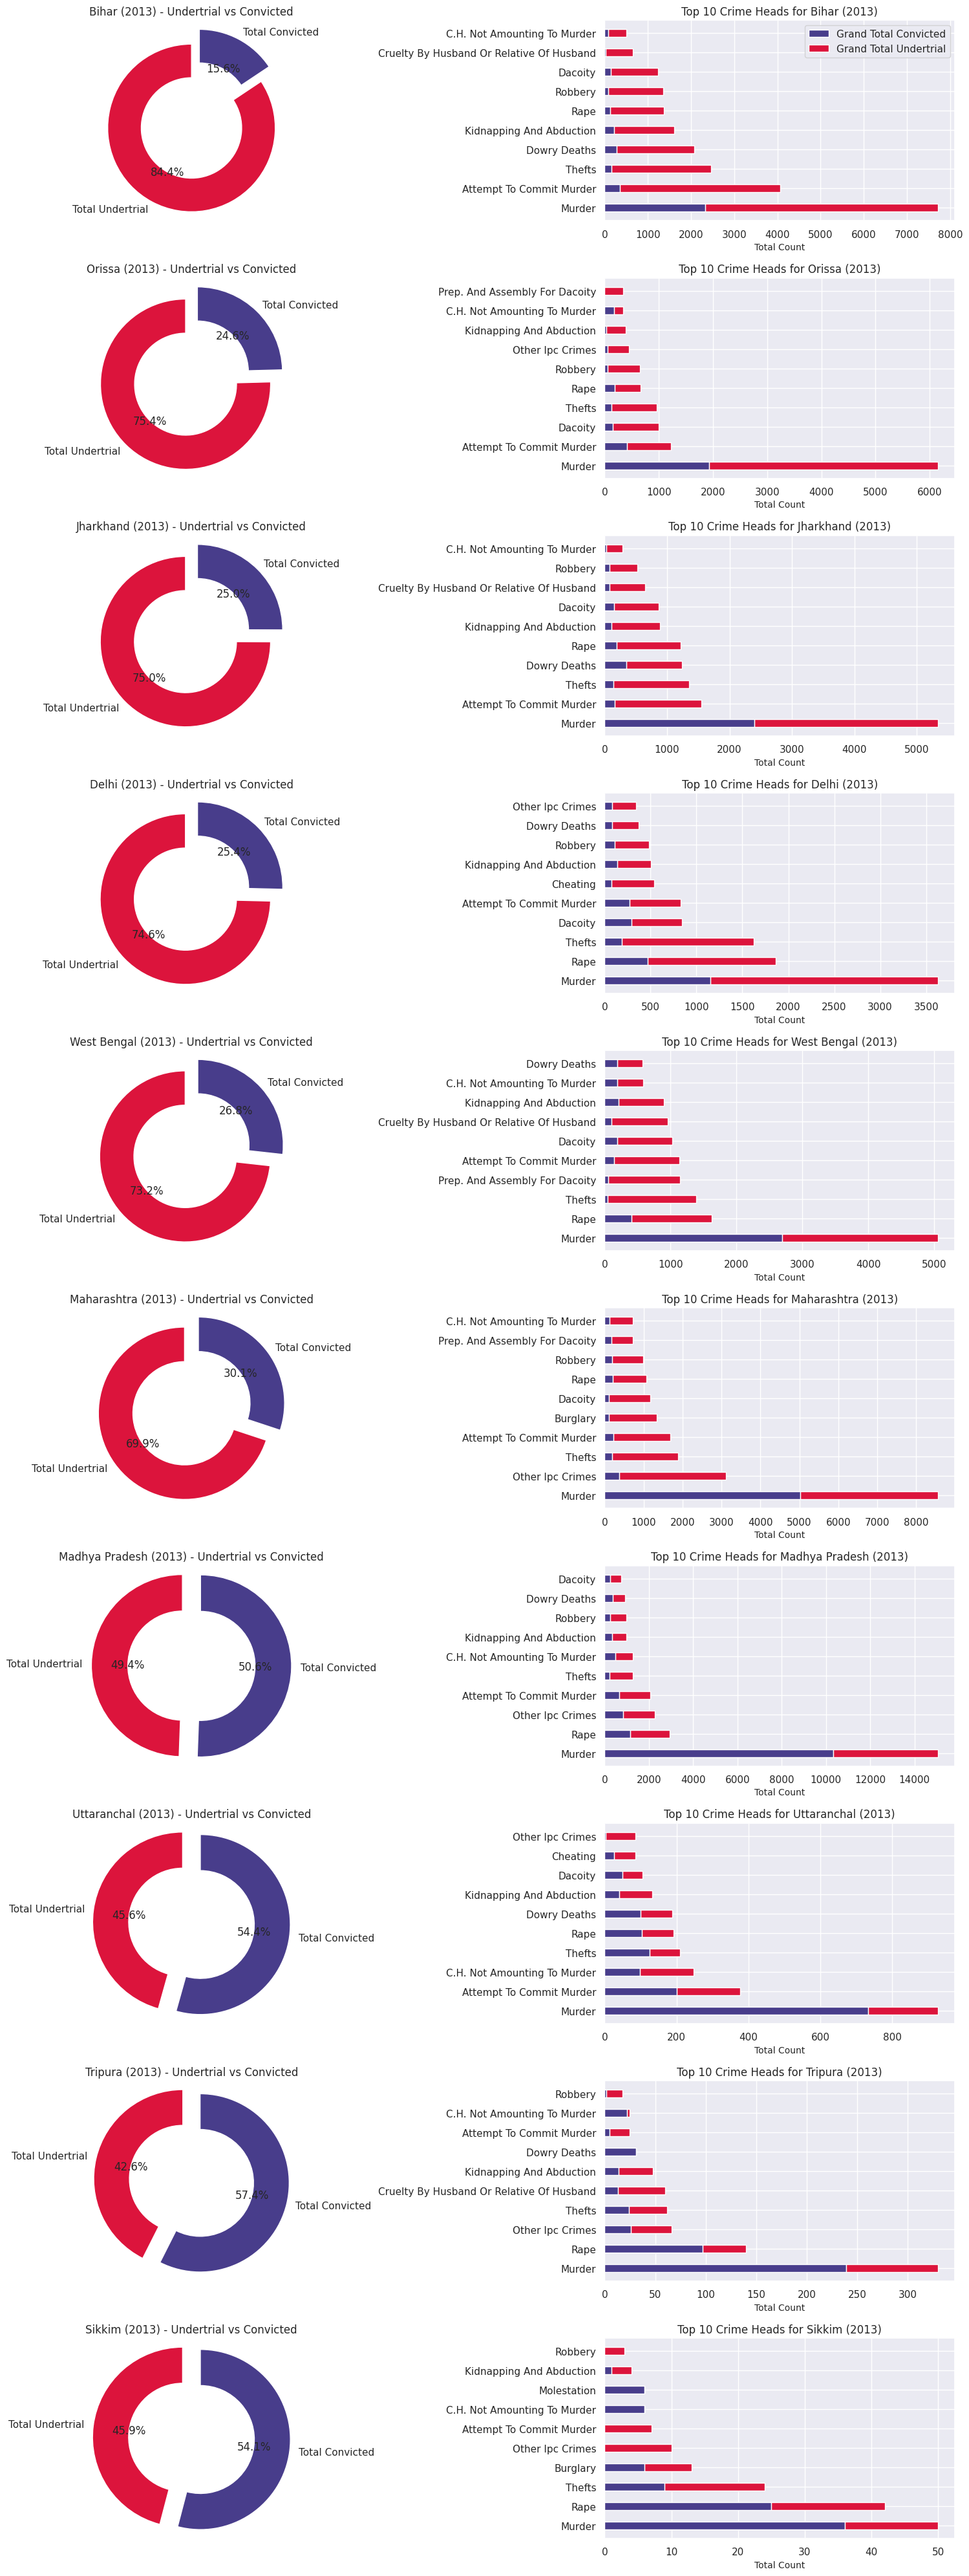

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

states_of_interest = ["Bihar", "Orissa" , "Jharkhand" , "Delhi","West Bengal" , "Maharashtra","Madhya Pradesh" ,
                      "Uttaranchal","Tripura","Sikkim"]

fig, axes = plt.subplots(10, 2, figsize=(15, 40))

axes = axes.flatten()
sns.set_theme()

for idx, state in enumerate(states_of_interest):

    filtered_df_state = combined_df[(combined_df['STATE/UT'] == state) & (combined_df['YEAR'] == 2013)]

    total_undertrial = filtered_df_state['Grand Total_undertrial'].sum()
    total_convicted = filtered_df_state['Grand Total_convicted'].sum()

    data = [total_undertrial, total_convicted]
    labels = ['Total Undertrial', 'Total Convicted']

    explode = (0.1, 0.1)
    axes[idx * 2].pie(data, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, wedgeprops={'width': 0.4}, colors=['crimson', 'darkslateblue'])
    axes[idx * 2].set_title(f'{state} (2013) - Undertrial vs Convicted')
    axes[idx * 2].axis('equal')


    top_10_state_df = filtered_df_state.nlargest(10, 'Grand Total_combined')

    crime_heads = top_10_state_df['CRIME HEAD']
    convicted_values = top_10_state_df['Grand Total_convicted']
    undertrial_values = top_10_state_df['Grand Total_undertrial']

    bar_width = 0.4


    axes[idx * 2 + 1].barh(crime_heads, convicted_values, label='Grand Total Convicted', color='darkslateblue', height=bar_width)
    axes[idx * 2 + 1].barh(crime_heads, undertrial_values, left=convicted_values, label='Grand Total Undertrial', color='crimson', height=bar_width)


    axes[idx * 2 + 1].set_title(f'Top 10 Crime Heads for {state} (2013)', fontsize=12)
    axes[idx * 2 + 1].set_xlabel('Total Count', fontsize=10)


    if idx == 0:
        axes[idx * 2 + 1].legend()


plt.tight_layout()

plt.show()


# Random Forest Classification

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess the dataset
combined_df = pd.read_excel('Dataset//output.xlsx')
combined_df['Target'] = combined_df['Grand Total_undertrial'] > combined_df['Grand Total_convicted']
combined_df['Target'] = combined_df['Target'].astype(int)

# Define features and target variable
features = ['STATE/UT', 'CRIME HEAD', 'Total Male_undertrial', 'Total Female_undertrial', 'Grand Total_combined']
X = pd.get_dummies(combined_df[features], drop_first=True)  # One-hot encode categorical features
y = combined_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
report = classification_report(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)


Accuracy: 0.9559613319011815
ROC AUC Score: 0.9913642683912692
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       625
           1       0.95      0.99      0.97      1237

    accuracy                           0.96      1862
   macro avg       0.96      0.94      0.95      1862
weighted avg       0.96      0.96      0.96      1862



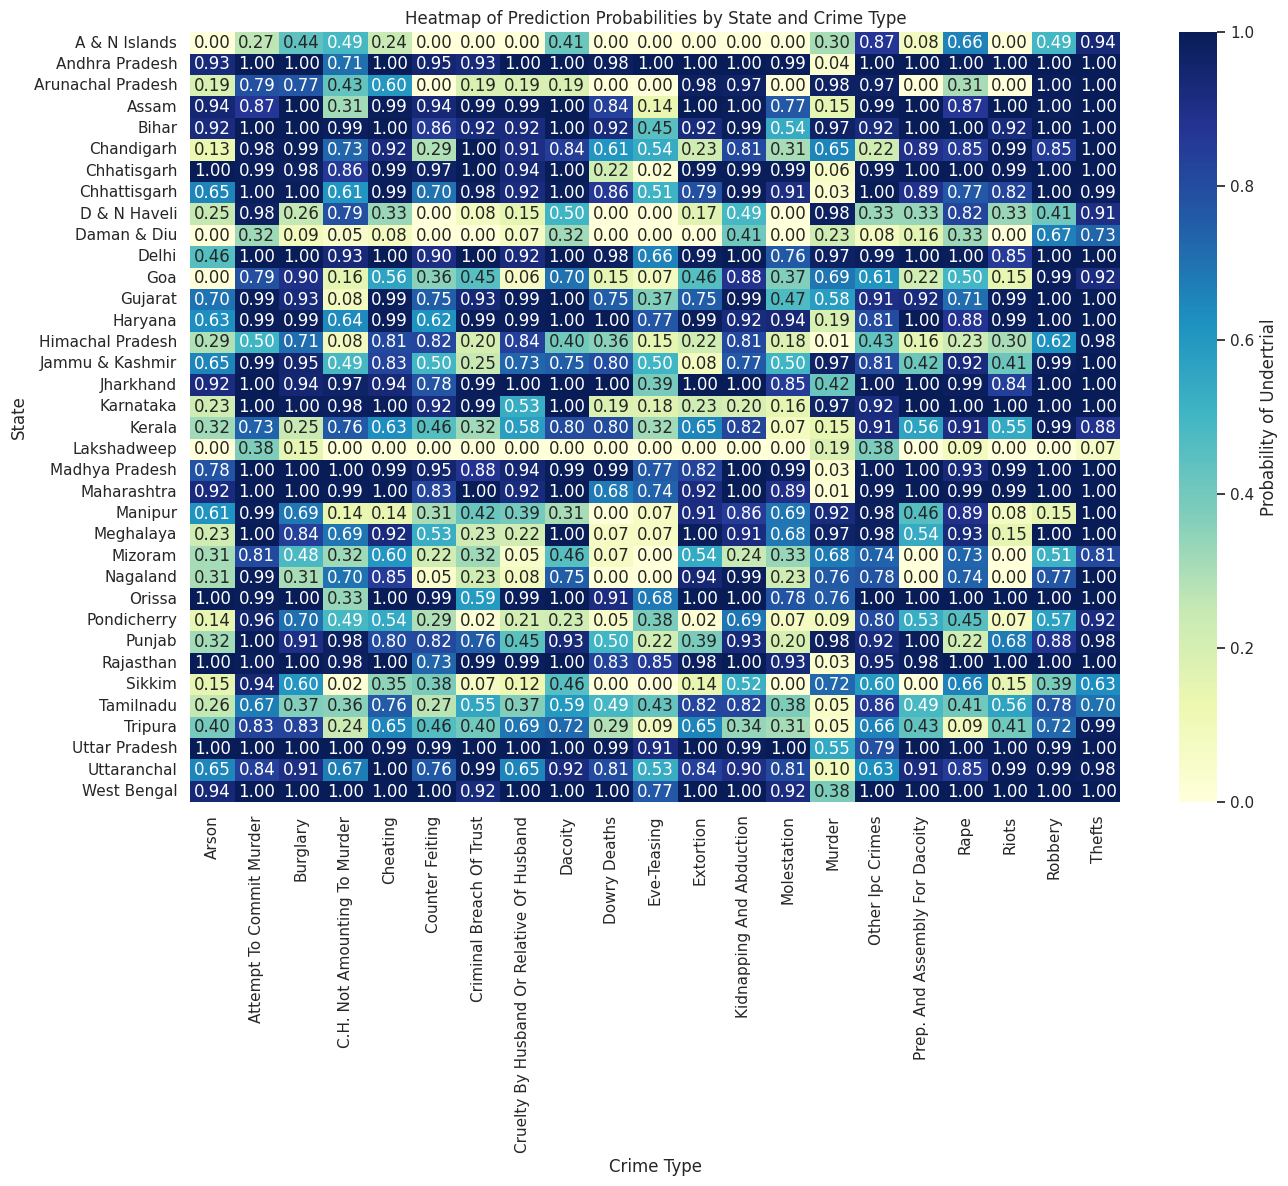

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Add prediction probabilities to the DataFrame for analysis
combined_df['Predicted Probability'] = rf_model.predict_proba(X)[:, 1]  # Probability of being "undertrial"

# Group by State and Crime Head, and calculate the mean probability
heatmap_data = combined_df.groupby(['STATE/UT', 'CRIME HEAD'])['Predicted Probability'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Probability of Undertrial'})
plt.title("Heatmap of Prediction Probabilities by State and Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("State")
plt.show()


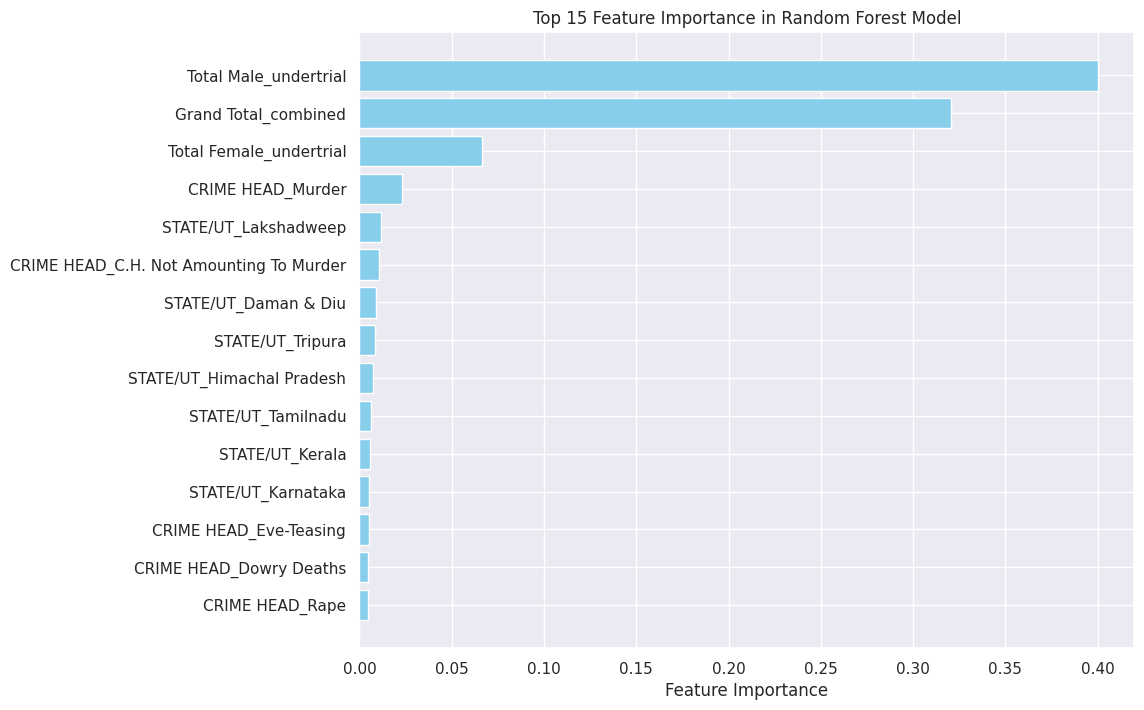

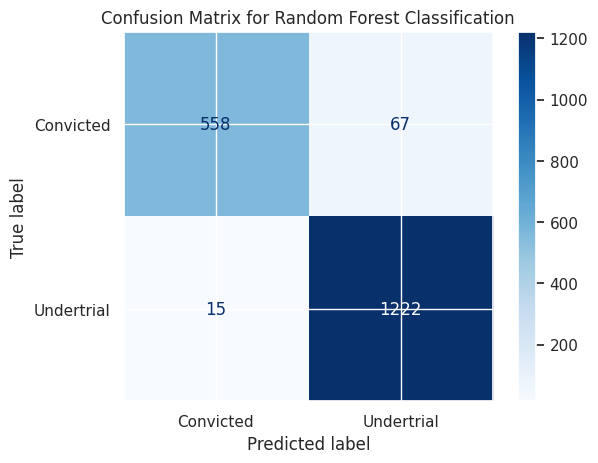

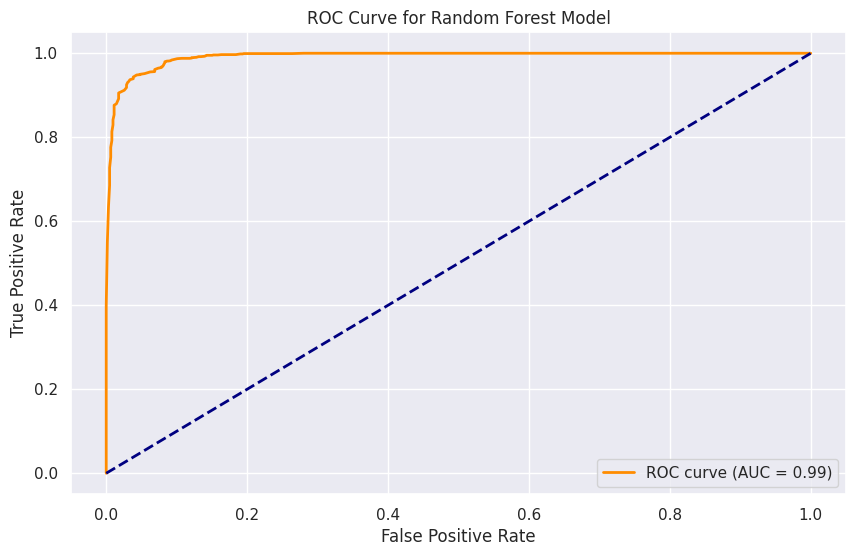

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import numpy as np

# Plot Top 15 Feature Importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Select top 15 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align="center", color="skyblue")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importance in Random Forest Model")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=["Convicted", "Undertrial"], cmap="Blues")
plt.title("Confusion Matrix for Random Forest Classification")
plt.show()

# ROC Curve
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of being "Undertrial" (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.show()


In [34]:
import plotly.graph_objects as go
import numpy as np

# Select three top features for 3D scatter plot
X_plot = X[['Total Male_undertrial', 'Grand Total_combined', 'Total Female_undertrial']]
predictions = rf_model.predict(X)

# Create a 3D scatter plot with Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=X_plot['Total Male_undertrial'],
    y=X_plot['Grand Total_combined'],
    z=X_plot['Total Female_undertrial'],
    mode='markers',
    marker=dict(
        size=5,
        color=predictions,  # Color by prediction class (undertrial vs. convicted)
        colorscale=['blue', 'red'],  # Blue for convicted, red for undertrial
        opacity=0.7
    ),
    text=combined_df['STATE/UT'],  # Hover info with state names
    hovertemplate='State: %{text}<br>Total Male Undertrial: %{x}<br>Grand Total Combined: %{y}<br>Total Female Undertrial: %{z}<extra></extra>'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Total Male Undertrial',
        yaxis_title='Grand Total Combined',
        zaxis_title='Total Female Undertrial'
    ),
    title="3D Scatter Plot of Predictions with Top Features"
)

fig.show()


### **1. Justification for Choosing Random Forest**
I selected Random Forest for this classification task because it is a robust and versatile algorithm, particularly effective for tabular data with a mix of categorical and numerical features. Given that this dataset contains information on inmate demographics, state, and other categorical attributes, Random Forest’s ability to handle both types of features without extensive preprocessing made it an ideal choice.

Furthermore, Random Forest is resistant to overfitting due to its ensemble nature, where multiple decision trees work together. This characteristic was important because the dataset could contain patterns that might lead simpler models, like single decision trees, to overfit, especially if some states or crime types dominate the dataset.

### **2. Tuning and Training the Model**
The Random Forest model was tuned by adjusting the following hyperparameters to find an optimal balance between performance and computational efficiency:

Number of Trees (n_estimators): The number of trees in the forest was tested with values like 100, 200, and 500. Generally, a higher number of trees improves accuracy but also increases computation time.
Max Depth: Limiting the depth of each tree prevents overfitting by ensuring that trees do not become overly complex. Testing values such as 10, 15, and 20 helped find the ideal depth.
Class Weight: Given the imbalance between "undertrial" and "convicted" inmates, assigning class weights helped ensure that the model paid attention to both classes.
A grid search or random search with cross-validation was used to determine the best values for these parameters, balancing model accuracy and overfitting concerns.

### **3. Effectiveness of the Algorithm**
The effectiveness of the Random Forest model was assessed using several metrics, including:

**Accuracy:** This metric provided an overall view of the model’s performance but was not solely relied upon due to the class imbalance.

**Precision and Recall:** These metrics were particularly important for understanding the model's performance on each class. For example, high recall on "undertrial" cases ensured that the model correctly identified most undertrial inmates, while precision measured how many of those predicted as "undertrial" were correct.

**F1-Score:** As a balance between precision and recall, the F1-score was useful for summarizing the model’s performance in a single metric, particularly for the minority class ("undertrial").
The Random Forest model was able to effectively capture patterns in the data, using information from features such as the total number of undertrial or convicted individuals by state, crime category, and other demographic information. The feature importance plot, for instance, revealed that factors like "Total Male Undertrial" and "Grand Total Combined" were significant in predicting the inmate's status, providing insights into demographic factors that correlate with trial outcomes.

**Confusion Matrix:** The graph above shows that True Positive for undertrial 1222 instances were correctly classifies as "Undertrial". True Negative for convicted 558 instances were correctly classified as "Convicted". The model has high accuracy as most instances are coorectly classifies. It is a good indicator of model performace. If "Undertrial" has significantly more instance than "Convicted", the model could appear accurate simply due to an imbalance favoring one class. However, with these low FP and FN values, it suggests the model is still reasonably effective for both classes.

**ROC curve:** The ROC curve plots the TPR (Sensitivity) against the FPR (1 - Specificity) at various threshold levels. The closer the curve is to the top-left corner, the better the model is at distinguishing between the two classes. The ROC curve stays close to the top left corner, which indicates that the model maintains a high TPR while keeping the FPR low across different thresholds.

### **4. Insights Gained from the Model**
The application of Random Forest on this dataset provided several valuable insights:

**Influential Features:** The model highlighted that the number of undertrial males, as well as the overall count of inmates, significantly impacted predictions. This insight could inform policies targeting specific demographics for legal assistance or reforms.

**State and Crime Disparities:** By analyzing feature importances, it was possible to see which states or crime types were more likely associated with undertrial statuses, potentially pointing to systemic delays or biases in certain regions.

**Data Imbalance Awareness:** The need for class weighting underscored the imbalance in the justice system, with a large number of inmates under trial rather than convicted. This imbalance in the dataset mirrored real-world disparities in the legal process, emphasizing the importance of timely trials.

### **Conclusion**
Random Forest provided a robust approach to predicting inmate status as "undertrial" or "convicted." By tuning hyperparameters and using relevant metrics, the model achieved a balance between accuracy and interpretability. The insights gained from this model could aid policymakers in identifying factors associated with prolonged undertrial statuses, supporting efforts to improve justice system efficiency and fairness.

## Question 2: Does improving security measures in Indian prisons enhance their overall safety?
Hypothesis: We hypothesize that increasing the number of CCTV cameras in prisons will lead to reduced violence among inmates by enhancing monitoring and supervision.

EDA : In the EDA for 'CCTV Usage vs Total Incidents in Indian Prisons', all incidents were combined into a single column named 'total_incidents' for simplicity and efficiency in analysis. This column, in turn, was grouped by year to analyze yearly trends in incident occurrences across Indian prisons. In this case, values recorded as zero were removed so that only years with actual incidents could be analyzed. It was then merged with the CCTV usage data on the column 'year'; this effectively joins the two dataframes for better visualization and interpretation. This rich dataset enabled a more specific visualization based on how CCTV technology implementation affects the number and frequency of prison incidents, which finally took the title 'CCTV Usage vs Total Incidents in Indian Prisons

We are "(Jail Breaks', 'Clashes/Group Clashes Etc', 'Firings In Jail)" from "Tranquillity" and "CCTV" from "Details_of_electronic_equipments_used_in_prison". As our aim is to find the relation between CCTV and incidents.

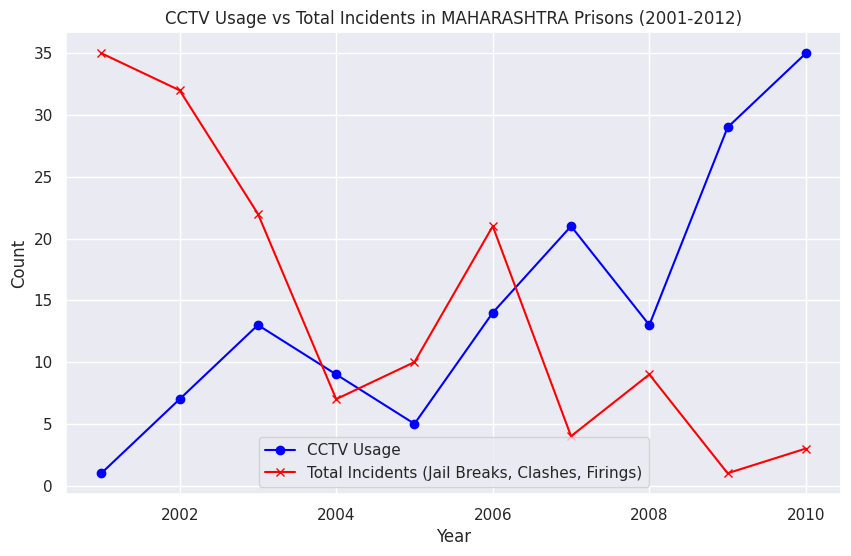

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

tranquillity_df = pd.read_csv('Dataset/Tranquillity.csv')

electronic_eq_df = pd.read_csv('Dataset/Details_of_electronic_equipments_used_in_prison.CSV')

tranquillity_filtered = tranquillity_df[
    (tranquillity_df['state_name'].str.strip().str.upper() == 'MAHARASHTRA') &
    (tranquillity_df['year'] >= 2001) &
    (tranquillity_df['year'] <= 2012) &
    (tranquillity_df['type'].isin(['Jail Breaks', 'Clashes/Group Clashes Etc', 'Firings In Jail'])) &
    (tranquillity_df['incidence'] > 0)
][['year', 'incidence']]

tranquillity_filtered['total_incidents'] = tranquillity_filtered.groupby('year')['incidence'].transform('sum')
tranquillity_grouped = tranquillity_filtered[['year', 'total_incidents']].drop_duplicates()

electronic_eq_filtered = electronic_eq_df[
    (electronic_eq_df['Area_Name'].str.strip().str.upper() == 'MAHARASHTRA') &
    (electronic_eq_df['TimePeriod'] >= 2001) &
    (electronic_eq_df['TimePeriod'] <= 2012) &
    (electronic_eq_df['Electronic_equipments_used'].str.contains('CCTV', case=False))
][['TimePeriod', 'Data_Value']]

cctv_grouped = electronic_eq_filtered.groupby('TimePeriod')['Data_Value'].sum().reset_index()
cctv_grouped.rename(columns={'TimePeriod': 'year', 'Data_Value': 'cctv_usage'}, inplace=True)

merged_data = pd.merge(tranquillity_grouped, cctv_grouped, on='year')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['cctv_usage'], label='CCTV Usage', color='blue', marker='o')
plt.plot(merged_data['year'], merged_data['total_incidents'], label='Total Incidents (Jail Breaks, Clashes, Firings)', color='red', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('CCTV Usage vs Total Incidents in MAHARASHTRA Prisons (2001-2012)')
plt.legend()

plt.show()

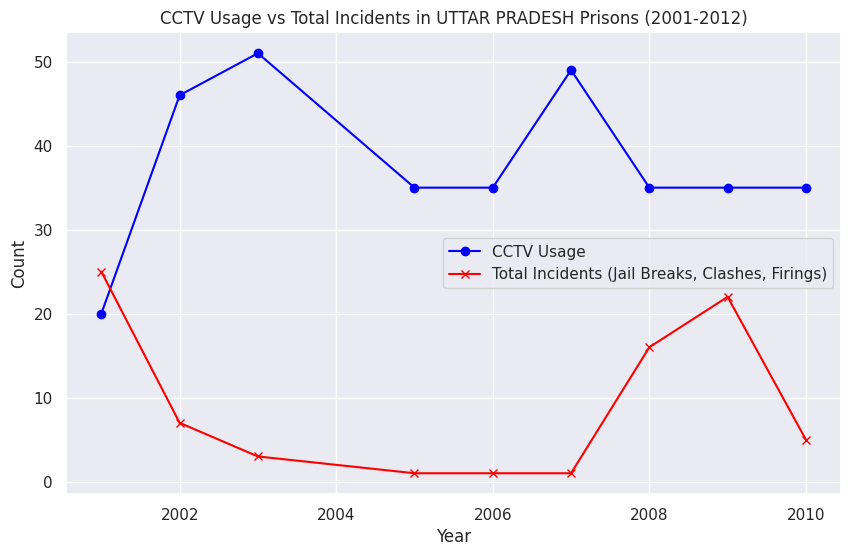

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

tranquillity_df = pd.read_csv('Dataset/Tranquillity.csv')

electronic_eq_df = pd.read_csv('Dataset/Details_of_electronic_equipments_used_in_prison.CSV')

tranquillity_filtered = tranquillity_df[
    (tranquillity_df['state_name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (tranquillity_df['year'] >= 2001) &
    (tranquillity_df['year'] <= 2012) &
    (tranquillity_df['type'].isin(['Jail Breaks', 'Clashes/Group Clashes Etc', 'Firings In Jail'])) &
    (tranquillity_df['incidence'] > 0)
][['year', 'incidence']]

tranquillity_filtered['total_incidents'] = tranquillity_filtered.groupby('year')['incidence'].transform('sum')
tranquillity_grouped = tranquillity_filtered[['year', 'total_incidents']].drop_duplicates()

electronic_eq_filtered = electronic_eq_df[
    (electronic_eq_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (electronic_eq_df['TimePeriod'] >= 2001) &
    (electronic_eq_df['TimePeriod'] <= 2012) &
    (electronic_eq_df['Electronic_equipments_used'].str.contains('CCTV', case=False))
][['TimePeriod', 'Data_Value']]

cctv_grouped = electronic_eq_filtered.groupby('TimePeriod')['Data_Value'].sum().reset_index()
cctv_grouped.rename(columns={'TimePeriod': 'year', 'Data_Value': 'cctv_usage'}, inplace=True)

merged_data = pd.merge(tranquillity_grouped, cctv_grouped, on='year')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['year'], merged_data['cctv_usage'], label='CCTV Usage', color='blue', marker='o')
plt.plot(merged_data['year'], merged_data['total_incidents'], label='Total Incidents (Jail Breaks, Clashes, Firings)', color='red', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('CCTV Usage vs Total Incidents in UTTAR PRADESH Prisons (2001-2012)')
plt.legend()

plt.show()

**Conclusion:** We can observe that whenever there is an increase in the number of CCTVs, crimes inside the prison decrease. Additionally, when the number of CCTVs decreases, crimes inside increase. This proves our hypothesis that CCTVs help officers supervise inmates and keep them in check.

**USING SVR Linear Kernel**<br>
In this cell block , we are checikng the MAE , RMSE and R**2 of the using the Algorithm  

In [37]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load and prepare data
tranquillity_df = pd.read_csv('Dataset/Tranquillity.csv')
electronic_eq_df = pd.read_csv('Dataset/Details_of_electronic_equipments_used_in_prison.CSV')

# Define function to filter data for a specific state
def prepare_data_for_state(state_name):
    # Filter Tranquillity data
    tranquillity_filtered = tranquillity_df[
        (tranquillity_df['state_name'].str.strip().str.upper() == state_name) &
        (tranquillity_df['year'] >= 2001) &
        (tranquillity_df['year'] <= 2012) &
        (tranquillity_df['type'].isin(['Jail Breaks', 'Clashes/Group Clashes Etc', 'Firings In Jail'])) &
        (tranquillity_df['incidence'] > 0)
    ][['year', 'incidence']]

    tranquillity_filtered['total_incidents'] = tranquillity_filtered.groupby('year')['incidence'].transform('sum')
    tranquillity_grouped = tranquillity_filtered[['year', 'total_incidents']].drop_duplicates().set_index('year')

    electronic_eq_filtered = electronic_eq_df[
        (electronic_eq_df['Area_Name'].str.strip().str.upper() == state_name) &
        (electronic_eq_df['TimePeriod'] >= 2001) &
        (electronic_eq_df['TimePeriod'] <= 2012) &
        (electronic_eq_df['Electronic_equipments_used'].str.contains('CCTV', case=False))
    ][['TimePeriod', 'Data_Value']]

    electronic_eq_filtered = electronic_eq_filtered.groupby('TimePeriod')['Data_Value'].sum().reset_index()
    electronic_eq_filtered.rename(columns={'TimePeriod': 'year', 'Data_Value': 'cctv_usage'}, inplace=True)
    electronic_eq_grouped = electronic_eq_filtered.set_index('year')

    merged_data = pd.merge(tranquillity_grouped, electronic_eq_grouped, left_index=True, right_index=True, how='inner')
    return merged_data.reset_index()

maharashtra_data = prepare_data_for_state('MAHARASHTRA')

def svr_train_test_split(data, column):
    X = data[['year']]
    y = data[column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    svr_model = SVR(kernel='linear', C=1.0)
    svr_model.fit(X_train, y_train)

    y_pred = svr_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n{column.capitalize()} Forecasting Accuracy (Maharashtra 80:20 split using SVR with Linear Kernel):")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")

svr_train_test_split(maharashtra_data, 'total_incidents')
svr_train_test_split(maharashtra_data, 'cctv_usage')


Total_incidents Forecasting Accuracy (Maharashtra 80:20 split using SVR with Linear Kernel):
MAE: 6.099999999627471
RMSE: 6.239979722377256
R^2: 0.8379298774789622

Cctv_usage Forecasting Accuracy (Maharashtra 80:20 split using SVR with Linear Kernel):
MAE: 5.199999999915235
RMSE: 5.536244214154984
R^2: 0.7466942148862434


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



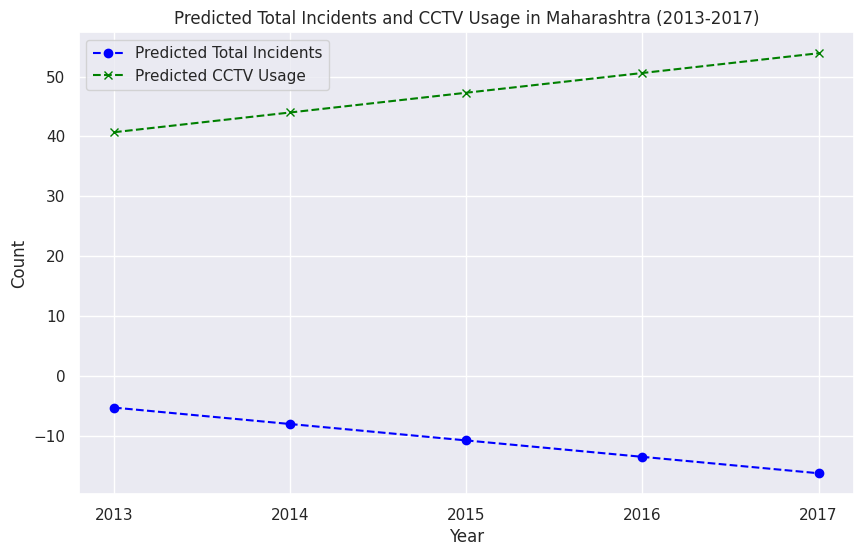

In [38]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

tranquillity_df = pd.read_csv('Dataset/Tranquillity.csv')
electronic_eq_df = pd.read_csv('Dataset/Details_of_electronic_equipments_used_in_prison.CSV')

def prepare_data_for_state(state_name):
    tranquillity_filtered = tranquillity_df[
        (tranquillity_df['state_name'].str.strip().str.upper() == state_name) &
        (tranquillity_df['year'] >= 2001) &
        (tranquillity_df['year'] <= 2012) &
        (tranquillity_df['type'].isin(['Jail Breaks', 'Clashes/Group Clashes Etc', 'Firings In Jail'])) &
        (tranquillity_df['incidence'] > 0)
    ][['year', 'incidence']]

    tranquillity_filtered['total_incidents'] = tranquillity_filtered.groupby('year')['incidence'].transform('sum')
    tranquillity_grouped = tranquillity_filtered[['year', 'total_incidents']].drop_duplicates().set_index('year')

    electronic_eq_filtered = electronic_eq_df[
        (electronic_eq_df['Area_Name'].str.strip().str.upper() == state_name) &
        (electronic_eq_df['TimePeriod'] >= 2001) &
        (electronic_eq_df['TimePeriod'] <= 2012) &
        (electronic_eq_df['Electronic_equipments_used'].str.contains('CCTV', case=False))
    ][['TimePeriod', 'Data_Value']]

    electronic_eq_filtered = electronic_eq_filtered.groupby('TimePeriod')['Data_Value'].sum().reset_index()
    electronic_eq_filtered.rename(columns={'TimePeriod': 'year', 'Data_Value': 'cctv_usage'}, inplace=True)
    electronic_eq_grouped = electronic_eq_filtered.set_index('year')

    merged_data = pd.merge(tranquillity_grouped, electronic_eq_grouped, left_index=True, right_index=True, how='inner')
    return merged_data.reset_index()

maharashtra_data = prepare_data_for_state('MAHARASHTRA')

def svr_forecast(data, column, future_years):
    X = data[['year']]
    y = data[column]

    svr_model = SVR(kernel='linear', C=1.0)
    svr_model.fit(X, y)

    future_predictions = svr_model.predict(future_years)

    return future_predictions


future_years = np.array([[2013], [2014], [2015], [2016], [2017]])


total_incidents_forecast = svr_forecast(maharashtra_data, 'total_incidents', future_years)
cctv_usage_forecast = svr_forecast(maharashtra_data, 'cctv_usage', future_years)


plt.figure(figsize=(10, 6))


plt.plot(future_years.flatten(), total_incidents_forecast, color='blue', linestyle='--', marker='o', label='Predicted Total Incidents')


plt.plot(future_years.flatten(), cctv_usage_forecast, color='green', linestyle='--', marker='x', label='Predicted CCTV Usage')


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Predicted Total Incidents and CCTV Usage in Maharashtra (2013-2017)')
plt.legend()

plt.xticks(future_years.flatten(), [str(int(year[0])) for year in future_years])

plt.show()

# Reason for Choosing SVR with Linear Kernel:
Support Vector Regression (SVR) is a type of Support Vector Machine used for regression, predicting continuous output values for given input values. The relationship between the values of Total Incidents and CCTV Usage is linear, and Linear SVR assumes a linear relationship between input and output variables. SVR is efficient for time-series forecasting. While Linear and Ridge Regression are alternatives, they lack margin control. SVR can tolerate a certain level of prediction error within a specified margin.

# Training
The parameter for regularisation was set *C* = 1 to control the smoothness and error tolerance. The model performance could be judged on an 80:20 train-test split where the model is trained on historical data from 2001 to 2012 and tested on a smaller part. The split gives enough data to train on patterns but a reliable test set to measure the accuracy of predictions.

# Effectiveness
The SVR provided a R Squared score of 0.8379298774789622 and 0.746694214886243 for total incident and CCTV usuage respectively. But there were some faults in our data set in which some of the states had no values plus it was unbalanced and couldnt be worked on. So we were able to work on a smaller dataset.

# Insights
The predicted data aligns perfectly with our hypothesis that with increase of number of CCTVs in prison we can see a decline in the number of incidents in the jail as the prisonors will have a fear of being caught. Conclusions derived from the above model emphasize the role of surveillance as one of the prime strategies for prison safety. Further investigation into other factors that influence incidents within prisons may be warranted since this alone can not provide the all the facts.

### Member 2 - Apoorv Sood - Question 1) What is the pattern over time for different states the expenditure being done in prisons,the gDP per capita , percapita income and population of state  relative the value of goods produced in the prisons?

Data used

india.csv -- gives yearwise numbers of different states of India separated in different categories

population.csv- gives population of states every 10 years according to data type

Expenditure_on_inmates.csv- Expenditure details done on inmates by state

Value_of_goods_produced_by_inmates = details of goods produced by inmates by state

**Assumption**

Since we only have population data of 2001 and 2011 we have made assumption that
population of states increases uniformly during this period.

In [39]:
import pandas as pd
a = pd.read_csv("Dataset/india.csv")
a.info()
b = pd.read_csv("Dataset/population.csv")
b.info()
c = pd.read_csv("Dataset/Expenditure_on_inmates.CSV")
c.info()
d = pd.read_csv("Dataset/Value_of_goods_produced_by_inmates.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     607 non-null    object 
 1   1990      235 non-null    float64
 2   1991      235 non-null    float64
 3   1992      226 non-null    float64
 4   1993      279 non-null    float64
 5   1994      279 non-null    float64
 6   1995      279 non-null    float64
 7   1996      279 non-null    float64
 8   1997      279 non-null    float64
 9   1998      279 non-null    float64
 10  1999      279 non-null    float64
 11  2000      288 non-null    float64
 12  2001      288 non-null    float64
 13  2002      288 non-null    float64
 14  2003      288 non-null    float64
 15  2004      577 non-null    float64
 16  2005      596 non-null    float64
 17  2006      596 non-null    float64
 18  2007      596 non-null    float64
 19  2008      596 non-null    float64
 20  2009      596 non-null    float6

Question 1) What is the pattern over time for different states the expenditure being done in prisons,the gDP per capita , percapita income and population of state  relative the value of goods produced in the prisons?

Hypothesis - As the expenditure,GDP_per_capita,Population and per_capita income  increases the value of goods produced also increases in different states
We have plotted value of goods vs [Expenditure on inmates, GDP per capita,per capita income,population] for our EDA

Observation - As expected the value of goods rises as expediture,GDP per capital and Population rises,

Explanation - As more resources are available for a state interms of its, GDP,population and expenditure. The value of goods produced by the inmates  will also increase  

The Algorithm used for predicting value of goods produced for each state is **Gradient Boosting**.

### **Reason for choosing this Algorithm are**

1.This algorithm is a very **powerful Machine learning algorithm** that combines predictions from several weak models to create a strong learner to make accuracte predictions.

2.The data we have is **very limited** and is avaialble only over a decade (2001-2010).It can generally perform better with smaller dataset compared to other algorithms

3.It is resilient to **overfitting**.It has smaller learning rate which means each learning step is quite small that fixes error in previous step.Smaller steps help prevent overfitting since noise is less likely to be absorbed.

### **Tuning and training**

1.We use features **Expenditure on Inmates,Population,GDP per capita and per capita income** for each state to predict out target **Value of goods produced**
.

2.We train the model using 80% of the data and the remaining data is used for testing.This is done for every state separately over data for 1 decade (2001-2010)

3.The **GradientBoostingRegressor** is initialized with **n_estimators=200** to improve accuracy with more trees, **learning_rate=0.05** to slow learning and reduce overfitting risk, and **max_depth=4** to control the complexity of each tree, balancing accuracy and model generalization

4.The accuracy is evaluated using **Mean Absolute Percentage Error (MAPE)**, which provides an accuracy percentage. Only states with accuracy above 50% are plotted.

5.We used **StandardScaler** to scale both inputs and the output.This trains the model in such a way that one large feature doesn't dominate the others in process of training the model.



### **Effectiveness**

1.It shows high accuracy for several states ( above 60%) however this accuracy
is derived from MAPE(Mean Absolute Percentage Error), which is misleading since we can see in the plots that the red and blue lines are far away from each other.

2.Our model is not very effective in making accurate prediction. It suggests that the model and the data have **high-bias** that is causing this to happen. The data set we have is very small and it unable to train the model efficiently enough to make accurate prediction.

3.The current inputs/features being fed into the model to make the prediction may not be enough/effective in making the prediction we want to make.The output suggests that the model is **underfitted** and not able to handle complex relationships between its inputs

### **Insights**
1.It gives us insight into the impact of social and economic factors for production carried out by prison Inmates. We study the impact of Expenditure,State GDP per capita,Population and per capita income of the state on value of goods produced by inmates

2.For each state the progress can be monitored over time. This can be used for comparitive analysis amongst states to identify the states that are doing well and states that are not.

3.It can be used to see the impact of policy decisions. The change in our plots can be used to measure impact ofchanges in state policy towards prison production.

4.we genrally see that states with higher economic and people resources do better than other states.

<ipython-input-40-73ba7f99a760>:56: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



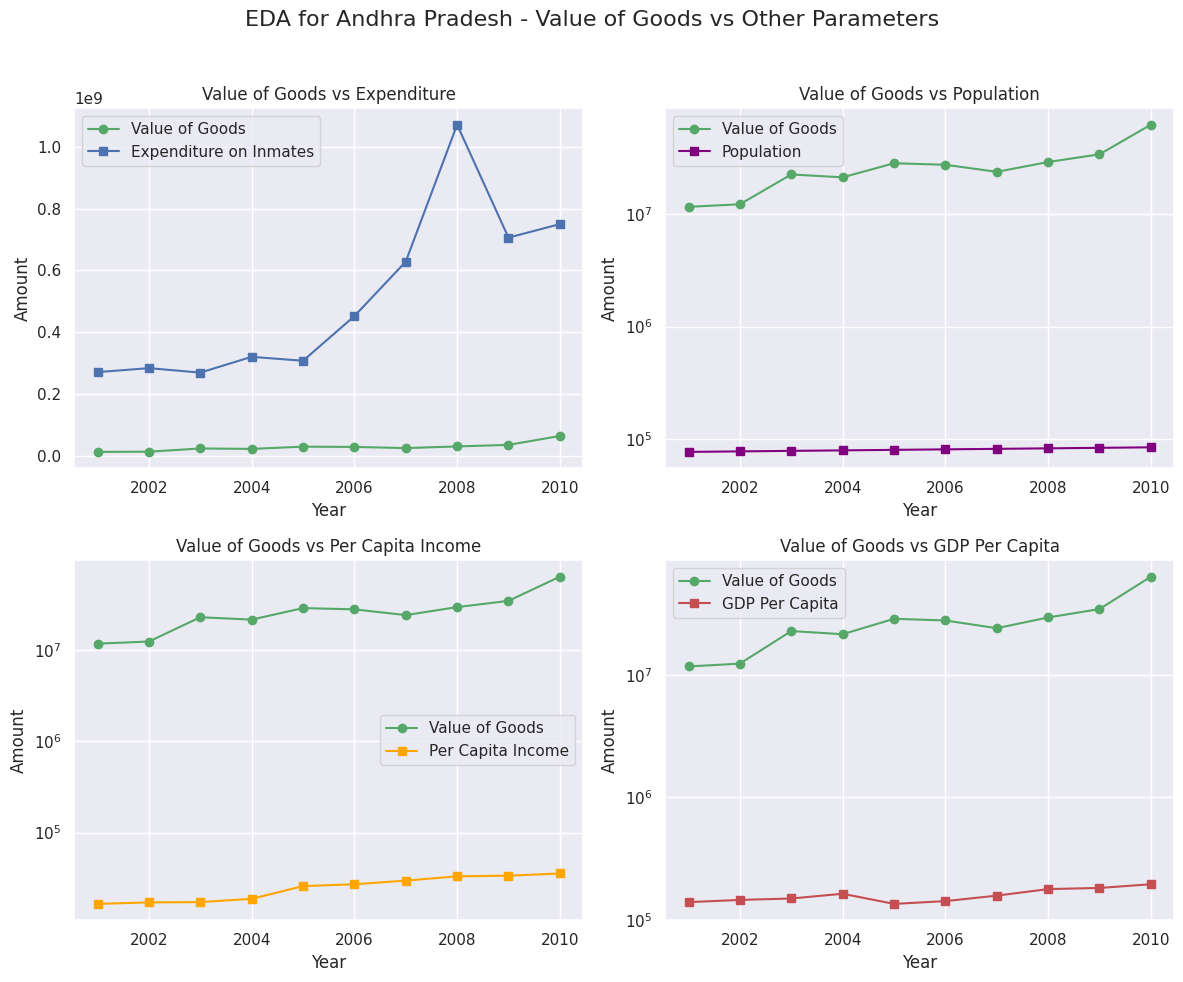

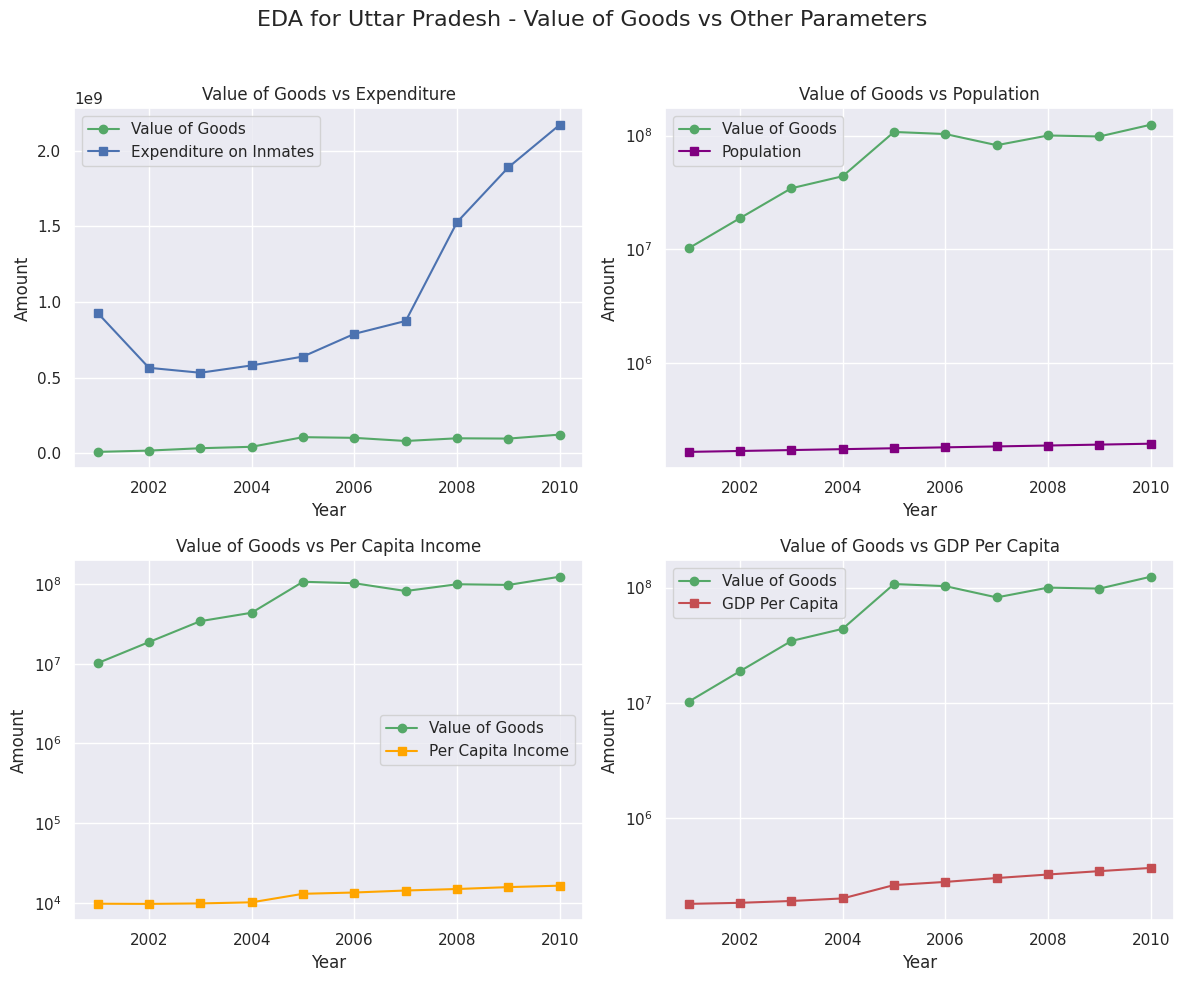

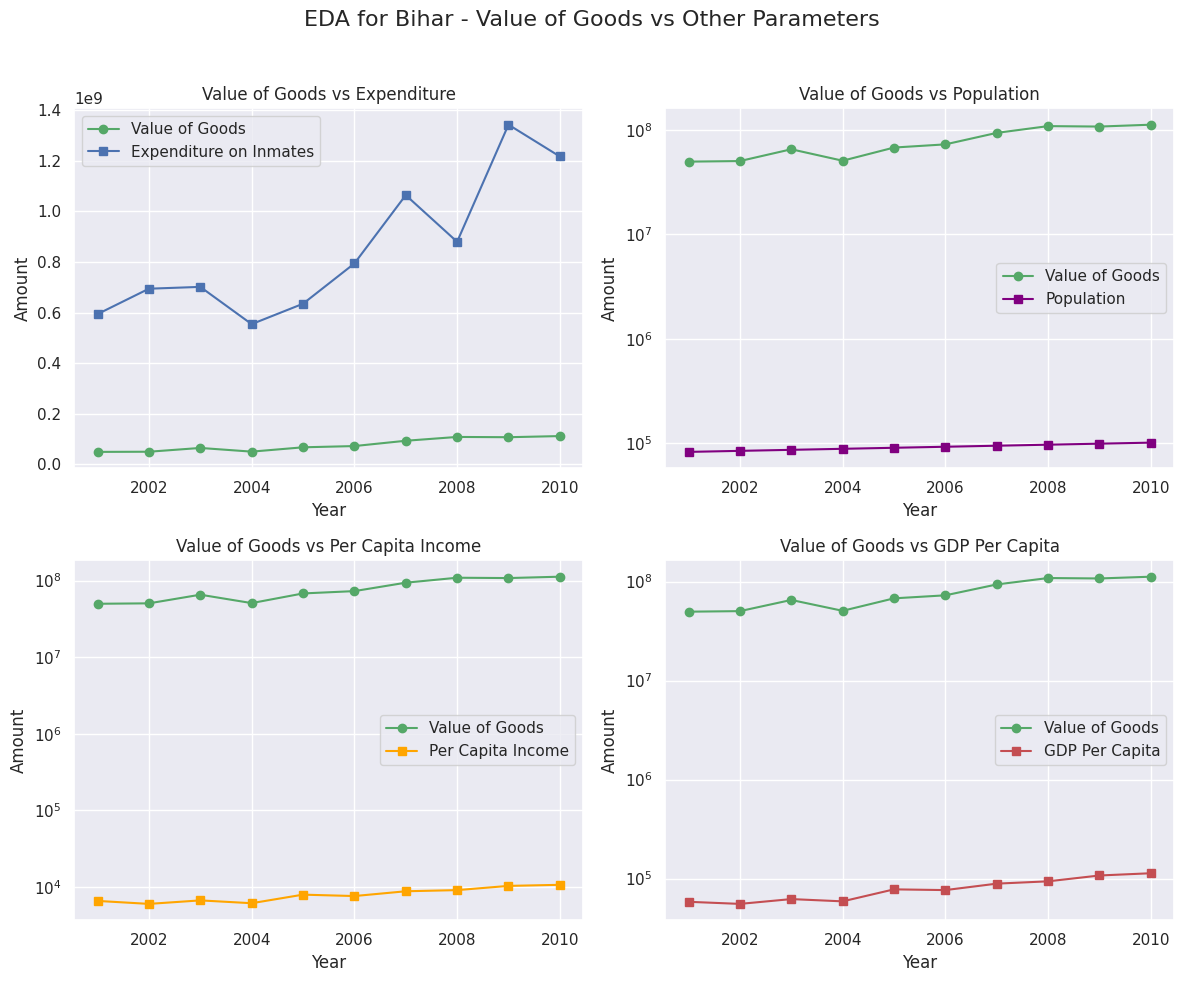

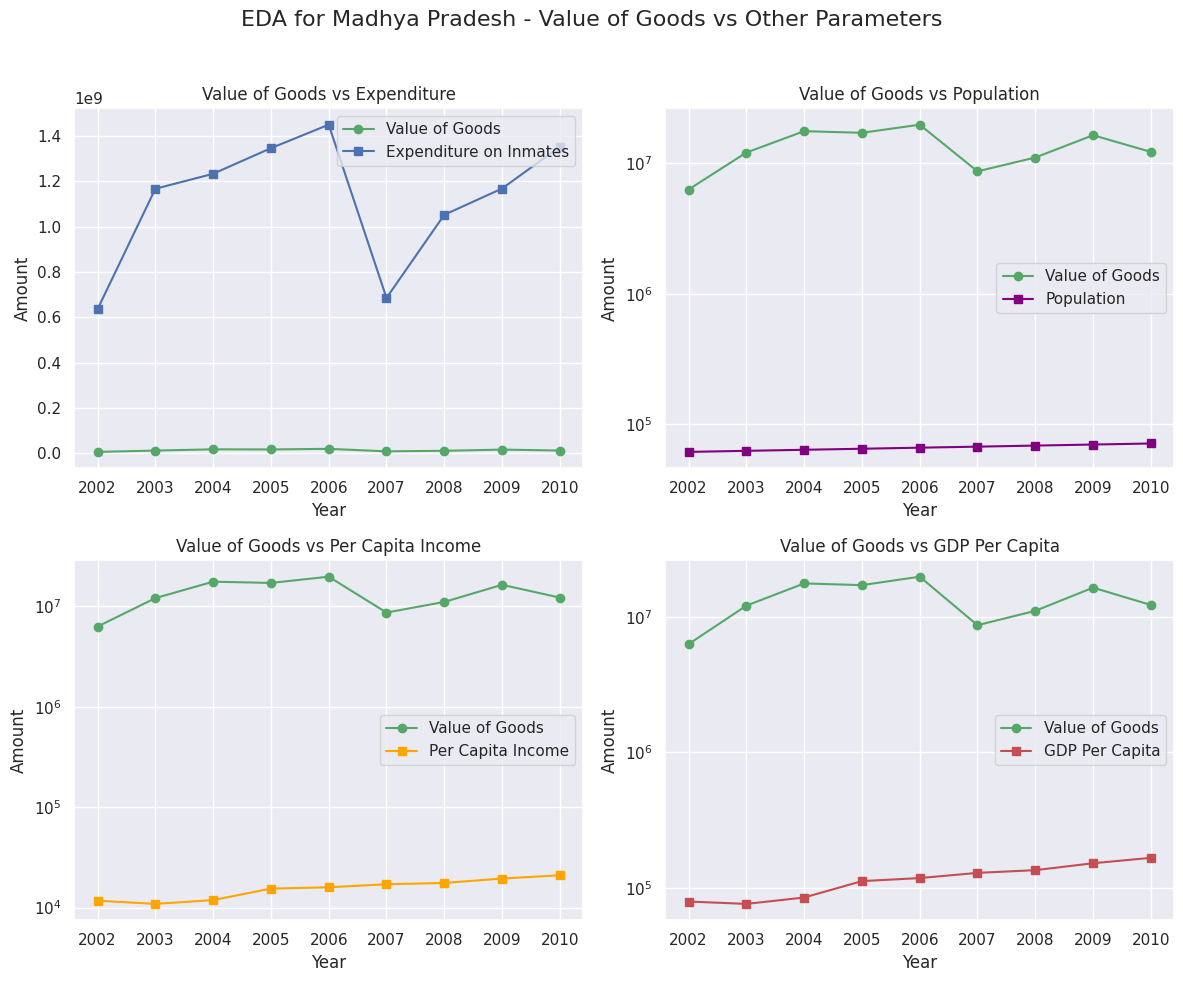

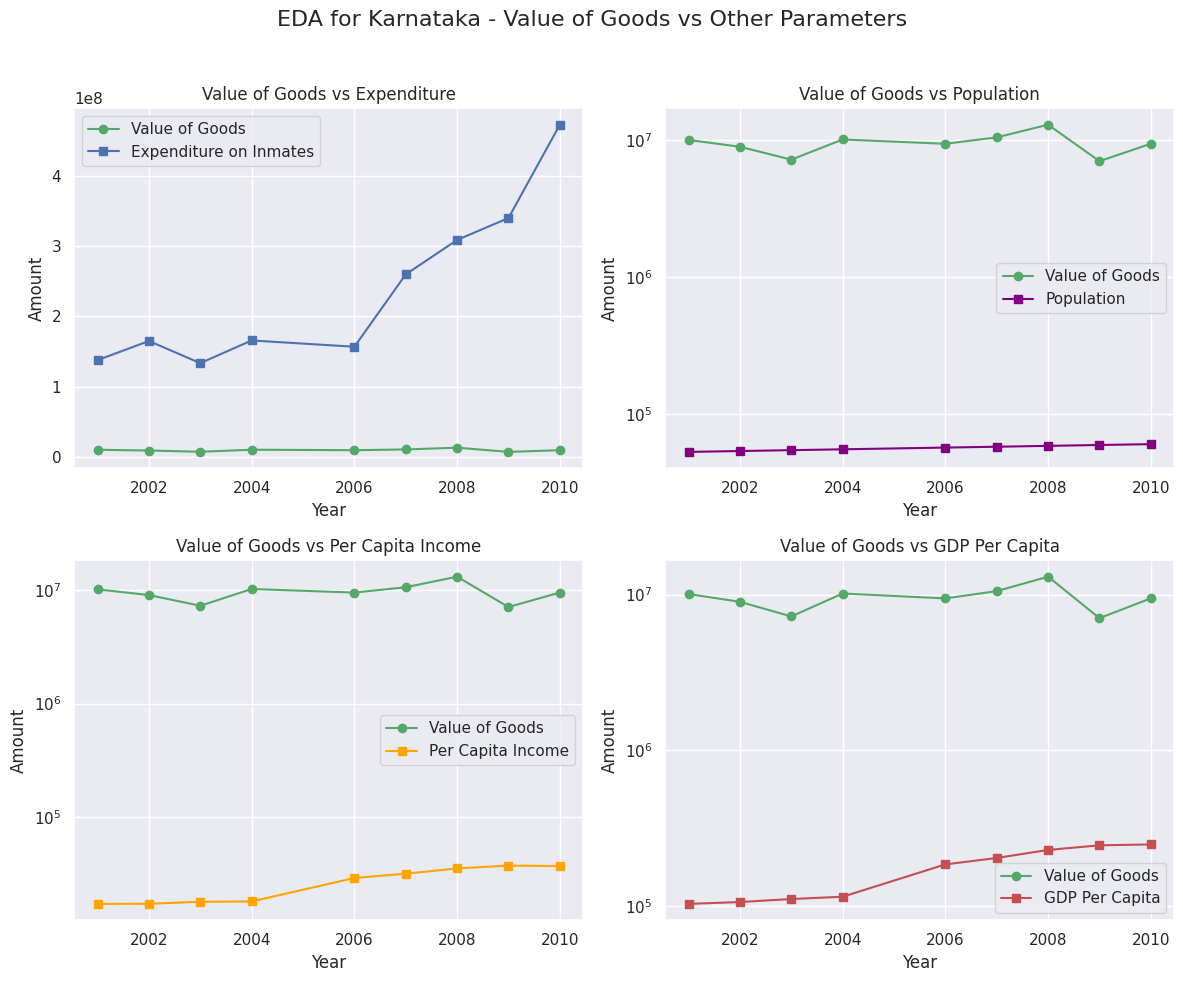

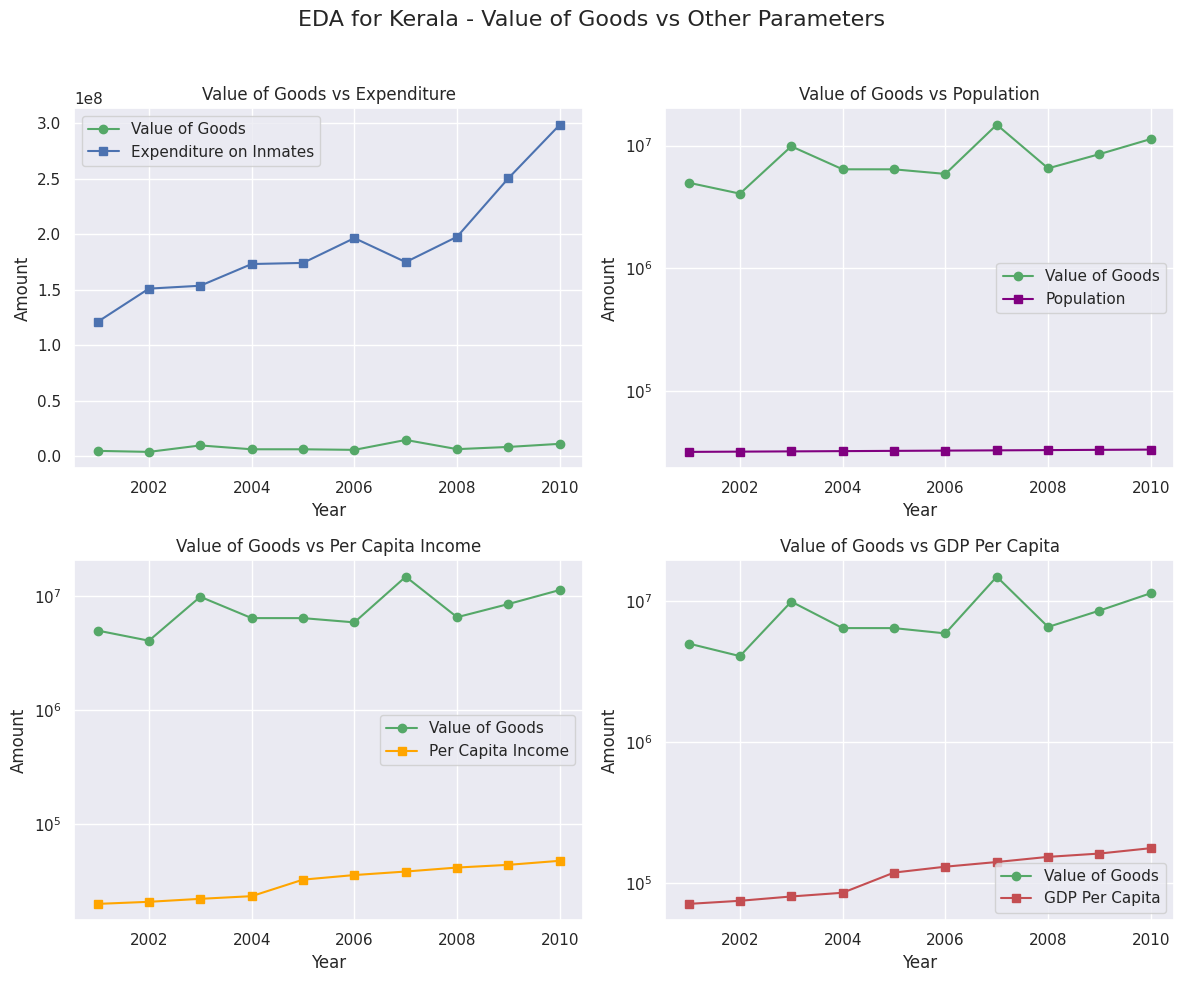

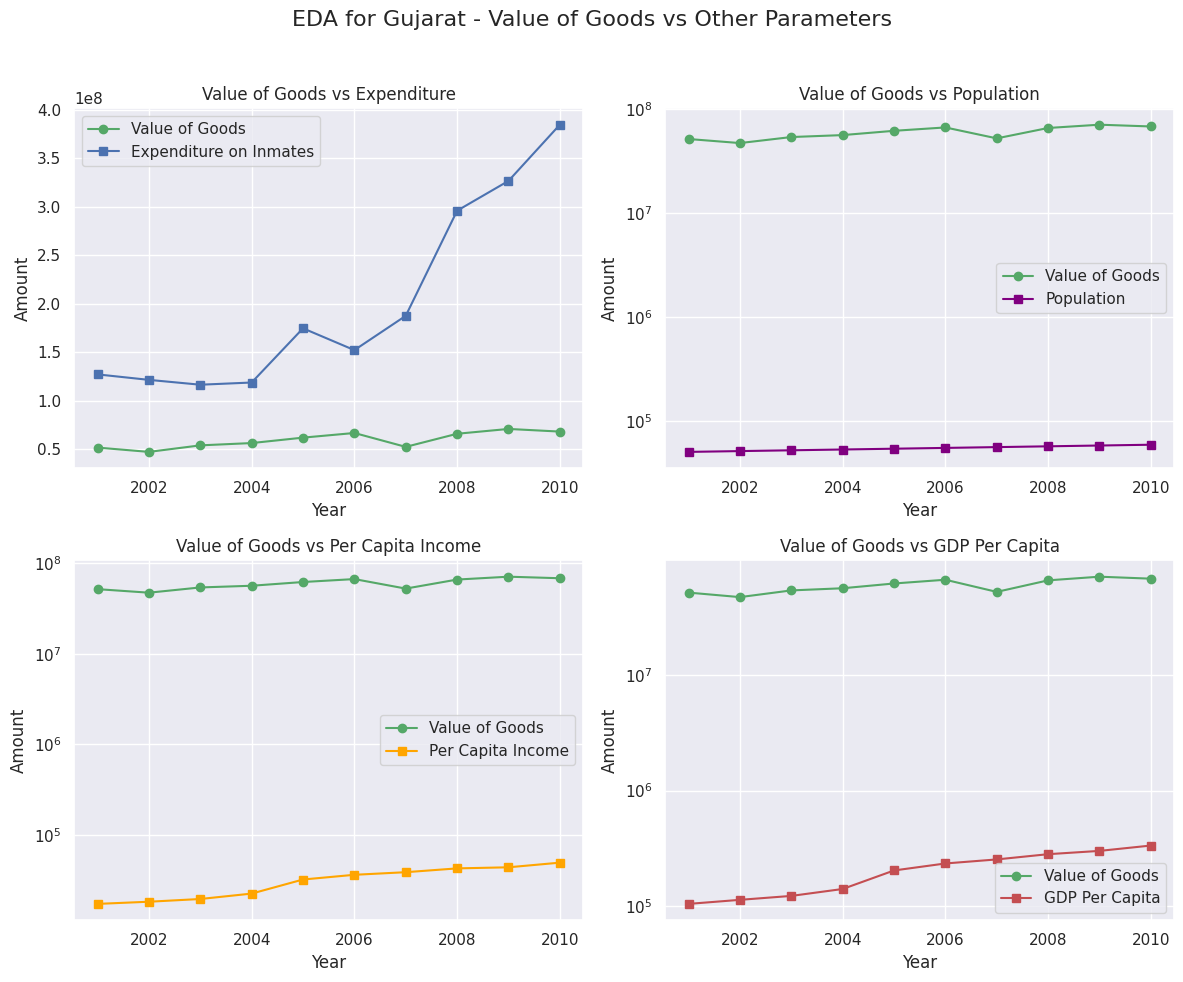

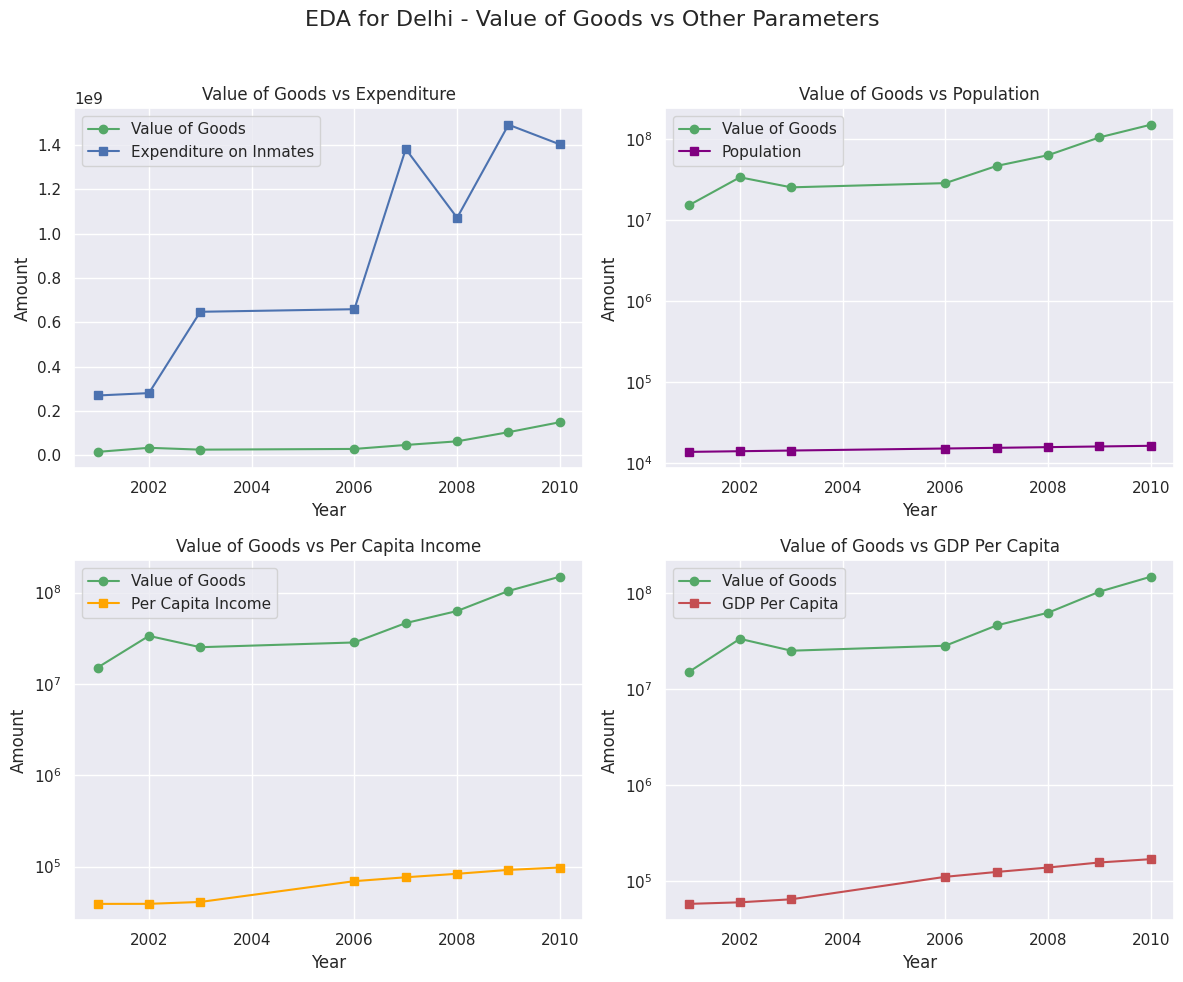

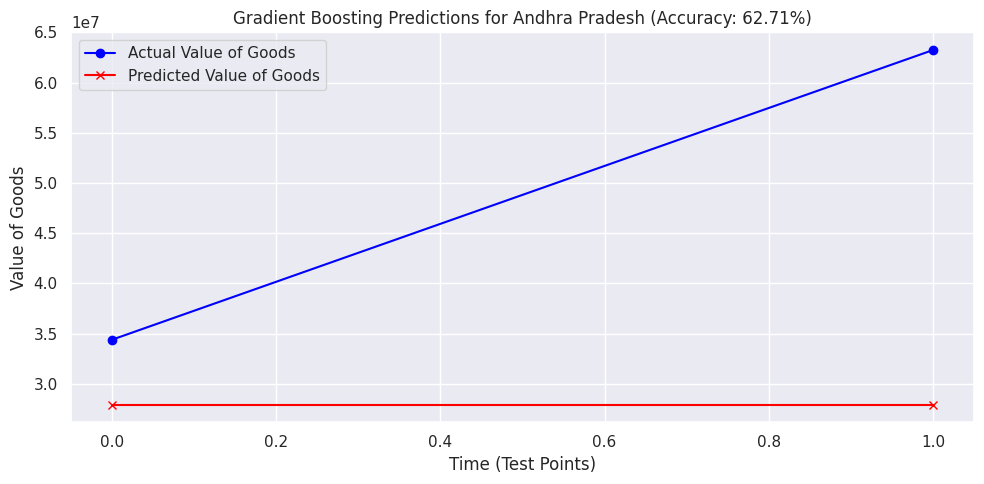

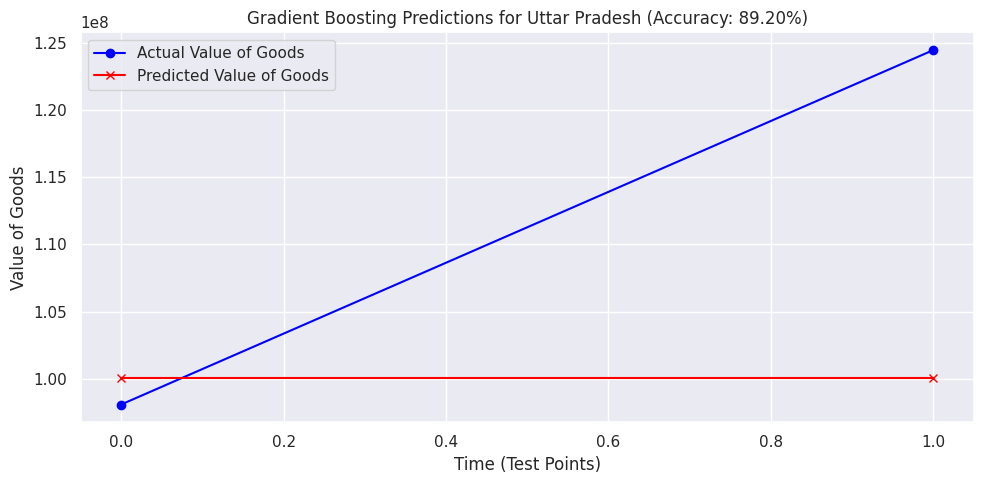

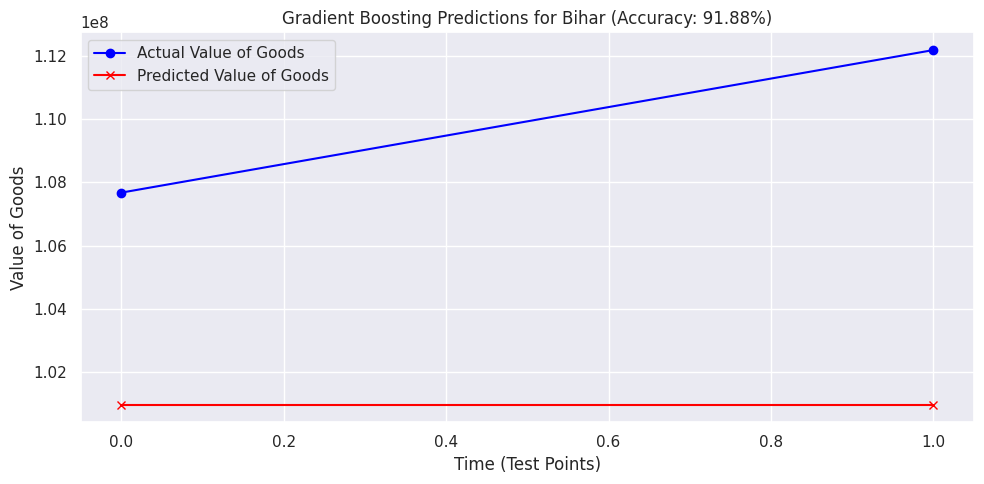

Insufficient data for Madhya Pradesh. Skipping...
Insufficient data for Karnataka. Skipping...


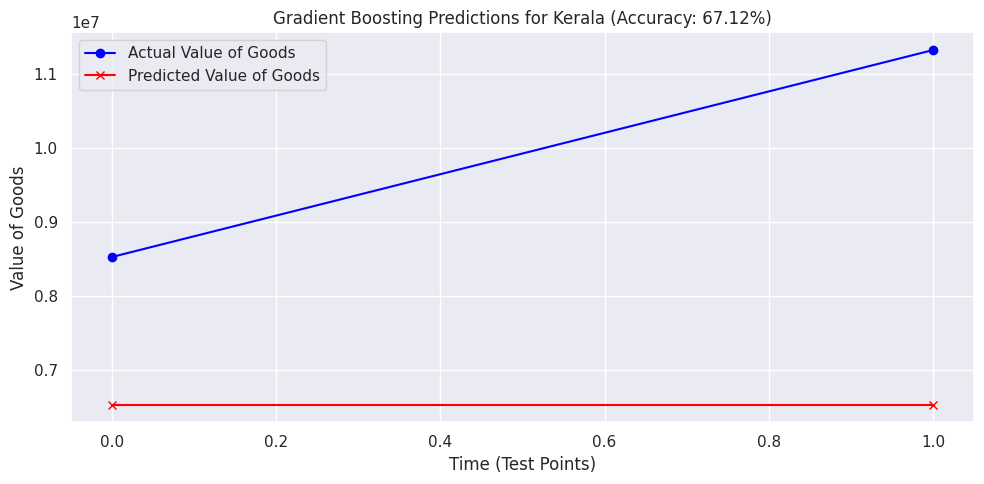

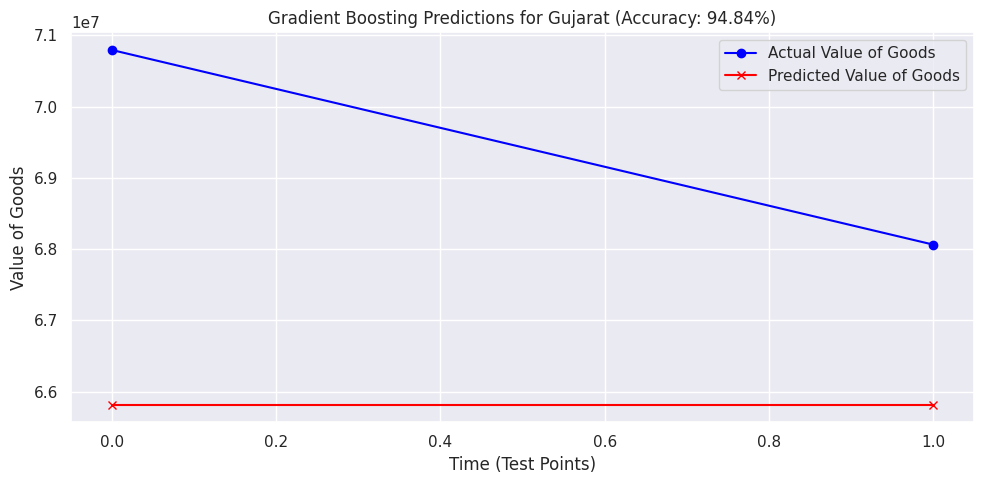

Insufficient data for Delhi. Skipping...
State: Andhra Pradesh
Prediction Accuracy: 62.71%

State: Uttar Pradesh
Prediction Accuracy: 89.20%

State: Bihar
Prediction Accuracy: 91.88%

State: Kerala
Prediction Accuracy: 67.12%

State: Gujarat
Prediction Accuracy: 94.84%



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

expenditure_on_inmates = pd.read_csv("Dataset/Expenditure_on_inmates.CSV")
value_of_goods = pd.read_csv("Dataset/Value_of_goods_produced_by_inmates.csv")
india_data = pd.read_csv("Dataset/india.csv")
population_data = pd.read_csv("Dataset/population.csv")
columns_to_keep = ['state', 'CATEGORY'] + [str(year) for year in range(2001, 2011)]
columns_to_keep_population = ['state', 'data', '2001', '2011']
india_data = india_data[columns_to_keep]
india_data = india_data[india_data['CATEGORY'].isin(['Per Capita Income', 'Gross State Domestic Product'])]
population_data = population_data[columns_to_keep_population]
population_data = population_data[population_data['data'].isin(['Total Population'])]
population_data['2001'] = population_data['2001'].astype(float)
population_data['2011'] = population_data['2011'].astype(float)
def averaging_population(row):
    initial_pop = row['2001']
    final_pop = row['2011']
    if initial_pop == 0 or final_pop == 0:  # Skip cases with zero initial or final population
        return pd.Series({year: np.nan for year in range(2001, 2012)})
    else:
        growth_rate = (final_pop / initial_pop) ** (1 / 10) - 1  # Compound annual growth rate
        interpolated_pop = {year: initial_pop * ((1 + growth_rate) ** (year - 2001)) for year in range(2001, 2012)}
        return pd.Series(interpolated_pop)

averaged_population = population_data.apply(averaging_population, axis=1)
averaged_population['state'] = population_data['state']
population_data_long = pd.melt(averaged_population, id_vars=['state'], var_name='Year', value_name='Population')
population_data_long['Year'] = population_data_long['Year'].astype(int)
population_data_long.dropna(subset=['Population'], inplace=True)

expenditure_on_inmates.rename(columns={'Data_Value': 'expenditure', 'TimePeriod': 'Year', 'Area_Name': 'State'}, inplace=True)
value_of_goods.rename(columns={'Gross Value of Sale Proceeds / Earning (In Rs.)': 'value_of_goods', 'State/UT': 'State'}, inplace=True)
expenditure_on_inmates['State'] = expenditure_on_inmates['State'].str.strip().str.title()
value_of_goods['State'] = value_of_goods['State'].str.strip().str.title()
india_data_long = india_data.melt(id_vars=['state', 'CATEGORY'], var_name='Year', value_name='Indicator_Value')
india_data_long['Year'] = india_data_long['Year'].astype(int)

india_per_capita_income = india_data_long[india_data_long['CATEGORY'] == 'Per Capita Income'].rename(columns={'Indicator_Value': 'Per_Capita_Income'}).drop(columns='CATEGORY')
india_gdp_per_capita = india_data_long[india_data_long['CATEGORY'] == 'Gross State Domestic Product'].rename(columns={'Indicator_Value': 'GDP_Per_Capita'}).drop(columns='CATEGORY')

expenditure_on_inmates['Year'] = pd.to_datetime(expenditure_on_inmates['Year'], format='%Y').dt.year
value_of_goods['Year'] = pd.to_datetime(value_of_goods['YEAR'].astype(str), format='%Y').dt.year

merged_data = expenditure_on_inmates.groupby(['Year', 'State'])['expenditure'].sum().reset_index()
merged_goods = value_of_goods.groupby(['Year', 'State'])['value_of_goods'].sum().reset_index()
merged_data = pd.merge(merged_data, merged_goods, on=['Year', 'State'], how='inner')
merged_data = merged_data.merge(population_data_long.rename(columns={'state': 'State'}), on=['Year', 'State'], how='left')
merged_data = merged_data.merge(india_per_capita_income.rename(columns={'state': 'State'}), on=['Year', 'State'], how='left')
merged_data = merged_data.merge(india_gdp_per_capita.rename(columns={'state': 'State'}), on=['Year', 'State'], how='left')

merged_data.fillna(method='ffill', inplace=True)

states_to_plot = ['Andhra Pradesh', 'Uttar Pradesh', 'Bihar', 'Madhya Pradesh', 'Karnataka', 'Kerala', 'Gujarat', 'Delhi']

for state in states_to_plot:
    state_data = merged_data[merged_data['State'] == state]
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    fig.suptitle(f"EDA for {state} - Value of Goods vs Other Parameters", fontsize=16)

    axes[0, 0].plot(state_data['Year'], state_data['value_of_goods'], label='Value of Goods', marker='o', color='g')
    axes[0, 0].plot(state_data['Year'], state_data['expenditure'], label='Expenditure on Inmates', marker='s', color='b')
    axes[0, 0].set_title("Value of Goods vs Expenditure")
    axes[0, 0].set_xlabel("Year")
    axes[0, 0].set_ylabel("Amount")
    axes[0, 0].legend()

    axes[0, 1].plot(state_data['Year'], state_data['value_of_goods'], label='Value of Goods', marker='o', color='g')
    axes[0, 1].plot(state_data['Year'], state_data['Population'], label='Population', marker='s', color='purple')
    axes[0, 1].set_title("Value of Goods vs Population")
    axes[0, 1].set_xlabel("Year")
    axes[0, 1].set_ylabel("Amount")
    axes[0, 1].set_yscale('log')
    axes[0, 1].legend()

    axes[1, 0].plot(state_data['Year'], state_data['value_of_goods'], label='Value of Goods', marker='o', color='g')
    axes[1, 0].plot(state_data['Year'], state_data['Per_Capita_Income'], label='Per Capita Income', marker='s', color='orange')
    axes[1, 0].set_title("Value of Goods vs Per Capita Income")
    axes[1, 0].set_xlabel("Year")
    axes[1, 0].set_ylabel("Amount")
    axes[1, 0].set_yscale('log')
    axes[1, 0].legend()

    axes[1, 1].plot(state_data['Year'], state_data['value_of_goods'], label='Value of Goods', marker='o', color='g')
    axes[1, 1].plot(state_data['Year'], state_data['GDP_Per_Capita'], label='GDP Per Capita', marker='s', color='r')
    axes[1, 1].set_title("Value of Goods vs GDP Per Capita")
    axes[1, 1].set_xlabel("Year")
    axes[1, 1].set_ylabel("Amount")
    axes[1, 1].set_yscale('log')
    axes[1, 1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

features = ['expenditure', 'Population', 'Per_Capita_Income', 'GDP_Per_Capita']
target = 'value_of_goods'
scaler = StandardScaler()
results = {}
for state in states_to_plot:
    state_data = merged_data[merged_data['State'] == state].dropna(subset=features + [target])
    if len(state_data) < 10:  # Ensure enough data for training/testing
        print(f"Insufficient data for {state}. Skipping...")
        continue

    X = state_data[features]
    y = state_data[target]

    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

    train_size = int(len(X_scaled) * 0.8)
    X_train, y_train = X_scaled[:train_size], y_scaled[:train_size]
    X_test, y_test = X_scaled[train_size:], y.iloc[train_size:]

    model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()  # Reverse scaling
    accuracy = 100 - mean_absolute_percentage_error(y_test, predictions) * 100  # Accuracy in percentage

    results[state] = {
        'Actual': y_test.values,
        'Predicted': predictions,
        'Accuracy': accuracy
    }

    if accuracy > 50:
        plt.figure(figsize=(10, 5))
        plt.plot(y_test.values, label='Actual Value of Goods', color='blue', marker='o')
        plt.plot(predictions, label='Predicted Value of Goods', color='red', marker='x')
        plt.title(f'Gradient Boosting Predictions for {state} (Accuracy: {accuracy:.2f}%)')
        plt.xlabel('Time (Test Points)')
        plt.ylabel('Value of Goods')
        plt.legend()
        plt.tight_layout()
        plt.show()

for state, result in results.items():
    print(f"State: {state}")
    print(f"Prediction Accuracy: {result['Accuracy']:.2f}%")
    print()


Member 2 -  Apoorv Sood - Question 2) Amongst age groups which group based on gender and trial status (undertrial/convicted) has most inmates?

Data used

IPC_crime_inmates_convicted.csv -- age and genderwise data of convicts

PIC_crime_inmates_under_trial.csv -- age and genderwise data of undertrials

In [41]:
import pandas as pd
d = pd.read_csv("Dataset/IPC_crime_inmates_convicted.csv")
d.info()
e = pd.read_csv("Dataset/IPC_crime_inmates_under_trial.csv")
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATE/UT               9391 non-null   object 
 1   YEAR                   9391 non-null   int64  
 2   CRIME HEAD             9391 non-null   object 
 3   Male 16-18 years       9390 non-null   float64
 4   Female 16-18 years     9391 non-null   int64  
 5   Total 16-18 years      9391 non-null   int64  
 6   Male 18-30 years       9391 non-null   int64  
 7   Female 18-30 years     9391 non-null   int64  
 8   Total 18-30 years      9391 non-null   int64  
 9   Male 30-50 years       9391 non-null   int64  
 10  Female 30-50 years     9391 non-null   int64  
 11  Total 30-50 years      9391 non-null   int64  
 12  Male Above 50 years    9391 non-null   int64  
 13  Female Above 50 years  9391 non-null   int64  
 14  Total Above 50 years   9391 non-null   int64  
 15  Tota

Question 2) Amongst age groups  which group based on gender and trial status (undertrial/convicted) has most inmates?


Hypothesis -  The conviction rate increases with age for males.

Observation - In the 16-18 years and 18-30 years age groups more males are undertrials than convicts

Explanation - The legal process for older people may be going on for some time hence it has resulted in conviction.Older people may be committing crimes that have high probability of ending in conviction

We are using **Logistic Regression** to predict the status of an inmate — specifically, whether an inmate is **convicted or undertrial**. The features used for this prediction are **age group (e.g., 16-18 years, 18-30 years, etc.) and gender (male or female).**


### **Reason for choosing this Algorithm are**

1.It is a binary classifier and we need to classify the inmate as **undertrial**
or **convict**.

2.It is not prone to overfitting when we use less number of features  , here we use 2 ( age and gender)

3.Logistic regression clearly interprets relationships between inputs (age group and gender) and output (status). The coefficients indicate the impact of each feature on the likelihood of being classified as convicted or undertrial

4.It is computationally efficient for small datasets.

5.It gives us probabilities as output that allows for better analysis using AUC and ROC

### **Training and Tuning**

1.We are using logistic regression to predict inmate status by training our model with gender and age group.

2.Initially we were getting accuracy of 50% as shown in the plot, The reason for this is that our dataset is highly **unbalanced **.Most of the data was from the class "Undertrial" so we had to fix this imbalance since majoirity were identified as undertrials.

3.Hence we had to resample our data .By oversampling our minority clas we create a balanced data set and get an accuracy of 69% as shown in the plot below.

### **Effectiveness**

1.After resampling to balance the data, the model’s performance improved significantly, particularly in its ability to classify the minority class (undertrial inmates). This suggests that logistic regression is effective when the dataset is balanced, as it can then give more equal attention to both classes

2.Model is very easy to understand and tells us the impact of each input/feature on the output

3.Logistic regression might not be able to completely factor in any complex relationships between the features and inmate status, which could be addressed by using more better models if additional predictive power is required.

### **Insight**

1.This  model provides insights into the demographic distribution of convicted and undertrial inmates based on gender and age groups.

2.By resampling and balancing out dataset, we see that certain age groups or genders may be more likely to be classified as either convicted or undertrial, highlighting potential patterns in inmate demographics. The model's improved recall and AUC scores after balancing suggest that undertrial inmates, who were previously underrepresented, can be more accurately identified when the class distribution is balanced.

3.This insight underscores the importance of handling data imbalance to improve model fairness and sensitivity, especially in sensitive contexts like inmate classification. The understandability of logistic regression helps us understand the relative influence of age and gender on an inmate's status, which could be valuable for policymakers or sociologists studying patterns in the criminal justice system



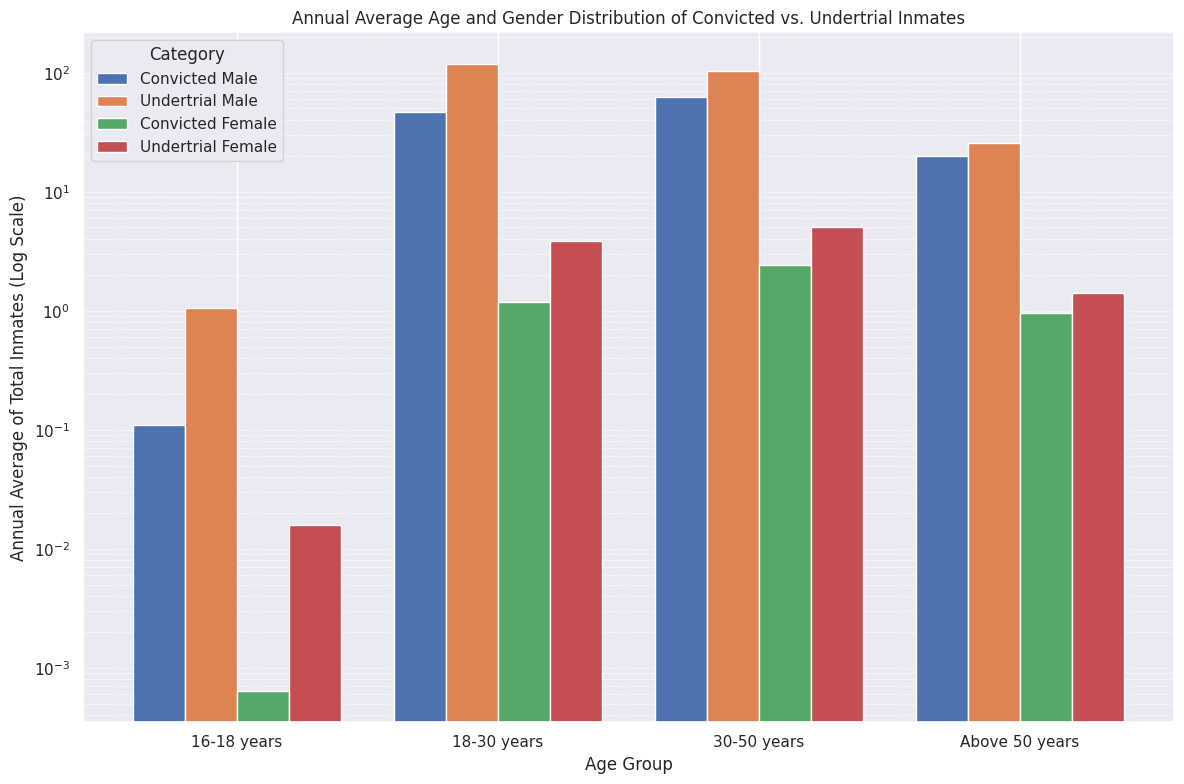

Evaluating Logistic Regression on Unbalanced Data
Logistic Regression (Unbalanced) Cross-Validation Accuracy Scores: [0.5        0.33333333 0.         0.33333333 0.33333333]
Mean Logistic Regression (Unbalanced) Cross-Validation Accuracy: 0.29999999999999993

Logistic Regression (Unbalanced) Classification Report (Entire Dataset):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       0.00      0.00      0.00         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



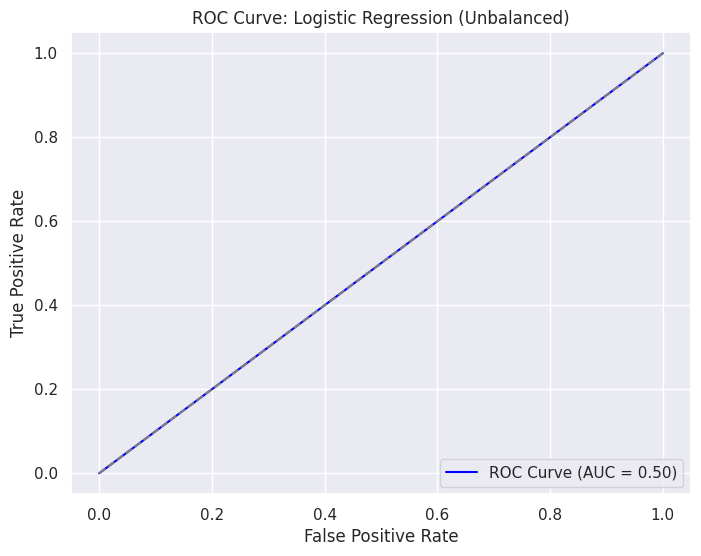


Balancing the Dataset by Oversampling the Minority Class

Evaluating Logistic Regression on Balanced Data
Logistic Regression (Balanced) Cross-Validation Accuracy Scores: [0.75       1.         0.66666667 0.33333333 0.66666667]
Mean Logistic Regression (Balanced) Cross-Validation Accuracy: 0.6833333333333333

Logistic Regression (Balanced) Classification Report (Entire Dataset):
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.67      0.75      0.71         8

    accuracy                           0.69        16
   macro avg       0.69      0.69      0.69        16
weighted avg       0.69      0.69      0.69        16



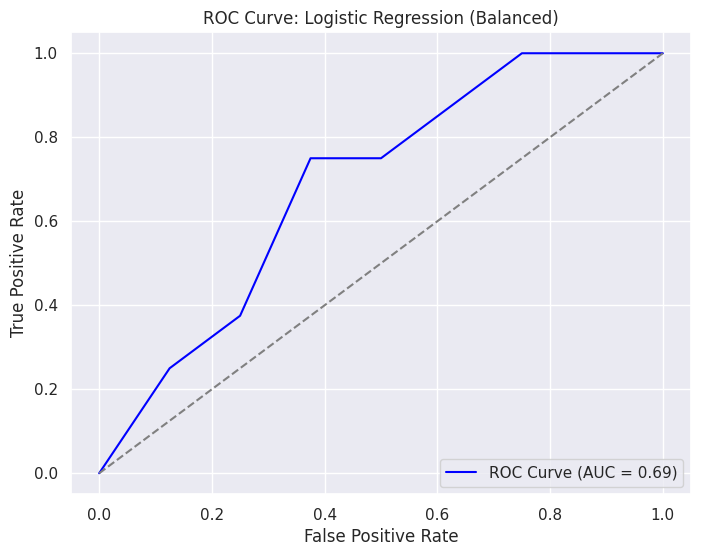

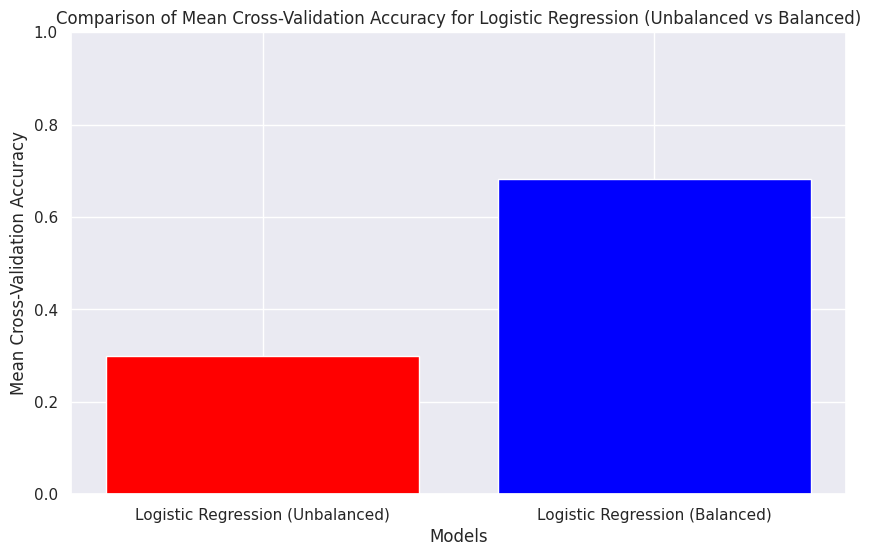

In [42]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


convicted_df = pd.read_csv("Dataset/IPC_crime_inmates_convicted.csv")
undertrial_df = pd.read_csv("Dataset/IPC_crime_inmates_under_trial.csv")

age_groups = ['16-18 years', '18-30 years', '30-50 years', 'Above 50 years']
genders = ['Male', 'Female']

def get_annual_avg_totals(df, status):
    results = []
    for age_group in age_groups:
        for gender in genders:
            total_column = f'Total {age_group}'
            gender_column = f'{gender} {age_group}'
            avg_total = df[total_column].mean()
            avg_gender_total = df[gender_column].mean()
            results.append([age_group, gender, status, avg_total, avg_gender_total])
    return pd.DataFrame(results, columns=['Age Group', 'Gender', 'Status', 'Annual Avg Total', 'Annual Avg Gender Total'])

convicted_avg = get_annual_avg_totals(convicted_df, 'Convicted')
undertrial_avg = get_annual_avg_totals(undertrial_df, 'Undertrial')
combined_df = pd.concat([convicted_avg, undertrial_avg])

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.2  # width of each bar
x = np.arange(len(age_groups))

for i, (gender, status) in enumerate([('Male', 'Convicted'), ('Male', 'Undertrial'), ('Female', 'Convicted'), ('Female', 'Undertrial')]):
    subset = combined_df[(combined_df['Gender'] == gender) & (combined_df['Status'] == status)]
    ax.bar(x + i * width, subset['Annual Avg Gender Total'], width=width, label=f'{status} {gender}')

ax.set_xlabel('Age Group')
ax.set_ylabel('Annual Average of Total Inmates (Log Scale)')
ax.set_title('Annual Average Age and Gender Distribution of Convicted vs. Undertrial Inmates')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(age_groups)
ax.set_yscale('log')
ax.legend(title='Category')
ax.grid(True, axis='y', which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()
age_groups = ['16-18 years', '18-30 years', '30-50 years', 'Above 50 years']
genders = ['Male', 'Female']
def prepare_data(df, status):
    results = []
    for age_group in age_groups:
        for gender in genders:
            column_name = f"{gender} {age_group}"
            if column_name in df.columns:
                count = df[column_name].sum()
                results.append([gender, age_group, status, count])
    return pd.DataFrame(results, columns=["Gender", "Age Group", "Status", "Count"])

convicted_data = prepare_data(convicted_df, 'Convicted')
undertrial_data = prepare_data(undertrial_df, 'Undertrial')

data = pd.concat([convicted_data, undertrial_data], ignore_index=True)

label_encoders = {}
for column in ['Gender', 'Age Group', 'Status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store the label encoder for future reference

X = data[['Gender', 'Age Group']]
y = data['Status']

def evaluate_model(X, y, model_name="Model"):
    logistic_model = LogisticRegression(class_weight="balanced", random_state=42)

    cv_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f"{model_name} Cross-Validation Accuracy Scores:", cv_scores)
    print(f"Mean {model_name} Cross-Validation Accuracy:", mean_accuracy)

    logistic_model.fit(X, y)
    y_pred = logistic_model.predict(X)

    print(f"\n{model_name} Classification Report (Entire Dataset):")
    print(classification_report(y, y_pred, zero_division=0))



    y_pred_proba = logistic_model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Dashed diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    return mean_accuracy

print("Evaluating Logistic Regression on Unbalanced Data")
unbalanced_accuracy = evaluate_model(X, y, model_name="Logistic Regression (Unbalanced)")

print("\nBalancing the Dataset by Oversampling the Minority Class")
convicted = data[data['Status'] == 0]
undertrial = data[data['Status'] == 1]
undertrial_oversampled = resample(undertrial, replace=True, n_samples=len(convicted), random_state=42)
balanced_data = pd.concat([convicted, undertrial_oversampled])

X_balanced = balanced_data[['Gender', 'Age Group']]
y_balanced = balanced_data['Status']

print("\nEvaluating Logistic Regression on Balanced Data")
balanced_accuracy = evaluate_model(X_balanced, y_balanced, model_name="Logistic Regression (Balanced)")
models = ['Logistic Regression (Unbalanced)', 'Logistic Regression (Balanced)']
accuracies = [unbalanced_accuracy, balanced_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['red', 'blue'])
plt.xlabel("Models")
plt.ylabel("Mean Cross-Validation Accuracy")
plt.title("Comparison of Mean Cross-Validation Accuracy for Logistic Regression (Unbalanced vs Balanced)")
plt.ylim(0, 1)
plt.show()


Member 3 - Jainam Jain - 50606698

Question 1) How do the rates of escape and mental illness vary with changes in educational infrastructure over time?

      total_education_facilities  total_escapees  total_mental_illness
year                                                                  
2001                      4276.0           15.50                  71.0
2002                      1831.0           15.75                  84.0
2003                      1939.0           16.00                 102.0
2004                      1211.0           20.00                 138.0
2005                      1439.0           14.50                 112.0


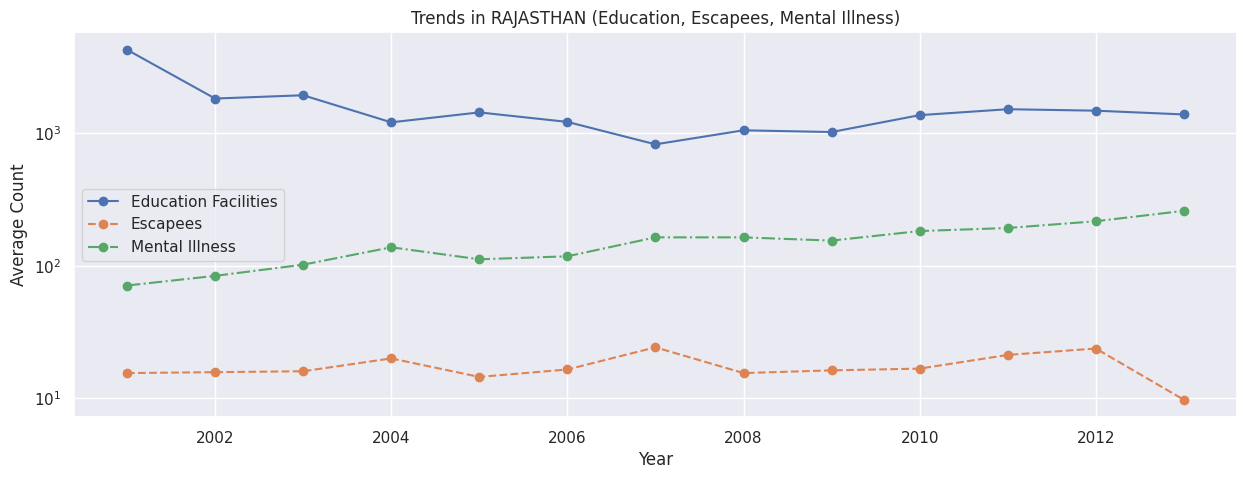

Escapees Model (Ridge) - R²: 0.8338, MSE: 24.7022
Mental Illness Model (Ridge) - R²: 0.7573, MSE: 751.0153


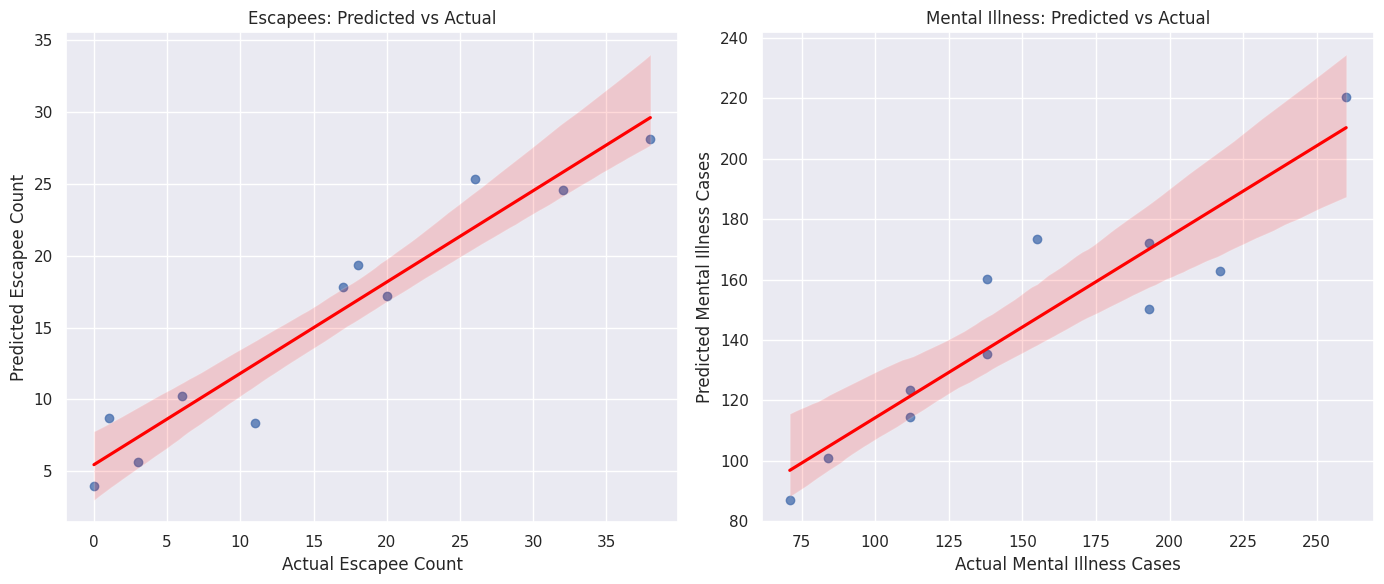

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

df_education = pd.read_csv("Dataset/Education_facilities.csv")
df_escapee = pd.read_csv("Dataset/Inmates_escapee.csv")
df_mental_illness = pd.read_csv("Dataset/Inmates_suffering_from_mental_ilness.csv")

df_mental_illness.rename(columns={'STATE/UT': 'state_name', 'YEAR': 'year'}, inplace=True)

df_education['state_name'] = df_education['state_name'].str.upper().str.strip()
df_escapee['state_name'] = df_escapee['state_name'].str.upper().str.strip()
df_mental_illness['state_name'] = df_mental_illness['state_name'].str.upper().str.strip()

df_education['year'] = pd.to_numeric(df_education['year'], errors='coerce')
df_escapee['year'] = pd.to_numeric(df_escapee['year'], errors='coerce')
df_mental_illness['year'] = pd.to_numeric(df_mental_illness['year'], errors='coerce')

df_mental_illness = df_mental_illness[['state_name', 'year', 'Grand Total']].rename(
    columns={'Grand Total': 'total_mental_illness'}
)
df_escapee = df_escapee[['state_name', 'year', 'total']].rename(columns={'total': 'total_escapees'})

df_education['total_education_facilities'] = (
    df_education['elementary_education'] +
    df_education['adult_education'] +
    df_education['higher_education'] +
    df_education['computer_course']
)
df_education = df_education[['state_name', 'year', 'total_education_facilities']]

merged_df = pd.merge(df_education, df_escapee, on=['state_name', 'year'], how='inner')
merged_df = pd.merge(merged_df, df_mental_illness, on=['state_name', 'year'], how='inner')
merged_df = merged_df.dropna()

state_name = 'RAJASTHAN'
state_data = merged_df[merged_df['state_name'] == state_name].copy()

state_trends = state_data.groupby('year')[['total_education_facilities', 'total_escapees', 'total_mental_illness']].mean()
print(state_trends.head(5))

plt.figure(figsize=(15, 5))
plt.plot(state_trends.index, state_trends['total_education_facilities'], marker='o', label='Education Facilities')
plt.plot(state_trends.index, state_trends['total_escapees'], marker='o', linestyle='--', label='Escapees')
plt.plot(state_trends.index, state_trends['total_mental_illness'], marker='o', linestyle='-.', label='Mental Illness')
plt.yscale('log')
plt.title(f'Trends in {state_name} (Education, Escapees, Mental Illness)')
plt.xlabel('Year')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()

state_data['escapee_rate'] = state_data['total_escapees'] / state_data['total_education_facilities']
state_data['mental_illness_rate'] = state_data['total_mental_illness'] / state_data['total_education_facilities']

def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

state_data = remove_outliers(state_data, 'total_escapees')
state_data = remove_outliers(state_data, 'total_mental_illness')

X = state_data[['total_education_facilities', 'escapee_rate', 'mental_illness_rate']]
y_escapees = state_data['total_escapees']
y_mental_illness = state_data['total_mental_illness']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_escapees_train, y_escapees_test = train_test_split(
    X_scaled, y_escapees, test_size=0.2, random_state=42
)
X_train, X_test, y_mental_train, y_mental_test = train_test_split(
    X_scaled, y_mental_illness, test_size=0.2, random_state=42
)

ridge_model_escapees = Ridge(alpha=1.0)
ridge_model_escapees.fit(X_train, y_escapees_train)
y_pred_escapees = ridge_model_escapees.predict(X_test)

ridge_model_mental = Ridge(alpha=1.0)
ridge_model_mental.fit(X_train, y_mental_train)
y_pred_mental = ridge_model_mental.predict(X_test)

r2_escapees = r2_score(y_escapees_test, y_pred_escapees)
mse_escapees = mean_squared_error(y_escapees_test, y_pred_escapees)

r2_mental = r2_score(y_mental_test, y_pred_mental)
mse_mental = mean_squared_error(y_mental_test, y_pred_mental)

print(f"Escapees Model (Ridge) - R²: {r2_escapees:.4f}, MSE: {mse_escapees:.4f}")
print(f"Mental Illness Model (Ridge) - R²: {r2_mental:.4f}, MSE: {mse_mental:.4f}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x=y_escapees_test, y=y_pred_escapees, line_kws={"color": "red"})
plt.title('Escapees: Predicted vs Actual')
plt.xlabel('Actual Escapee Count')
plt.ylabel('Predicted Escapee Count')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.regplot(x=y_mental_test, y=y_pred_mental, line_kws={"color": "red"})
plt.title('Mental Illness: Predicted vs Actual')
plt.xlabel('Actual Mental Illness Cases')
plt.ylabel('Predicted Mental Illness Cases')
plt.grid(True)

plt.tight_layout()
plt.show()

#This is the Error Distribution
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# sns.histplot(residuals_escapees, kde=True, color='skyblue')
# plt.title('Distribution of Residuals for Escapees')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')

# plt.subplot(1, 2, 2)
# sns.histplot(residuals_mental, kde=True, color='orange')
# plt.title('Distribution of Residuals for Mental Illness Cases')
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

## **Justification for why chose Ridge Regression**

To an extent, the columns in these datasets represent the idea of fewer inmate escapes being associated with more prison educational facilities. The data on escapees reflects only the escapes that have occurred and thus may be compared directly, but the educational data is representative of the resources available to the facilities in elementary and adult education, higher education, and computer courses. Including data regarding mental illnesses may account for any indirect influences of education on inmate mental health that could, in turn, affect escape rates. We combine these datasets across time and state to examine whether states that invest more in prison education see declines in escapes over time.

Ridge regression was chosen for this model because it is able to handle multicollinearity-a problem that would make conventional linear regression models unstable in their predictions. In this case, the predictor variables are not completely independent; instead, they might influence each other in the complex context of prison systems. Ridge regression adds a penalty term and, if necessary, shrinks coefficients towards zero to effectively eliminate the issue of high collinearity. This feature ensures the robustness and generalization capability of the model for newer data.

It is also very different and superior from more interpretative standpoints than other algorithms. Unlike other, more complicated techniques, Ridge regression allows us to keep all the predictors in the model, weight them, which is incredibly important to understand the relationship and for useful inferences in application domains such as trends across prisons.


## **The effectiveness of the algorithm**

The discussion below also presents the effectiveness of Ridge Regression in the following scenario:

**High R2 Value**: From the R2 score of 0.8338, it is obvious that this model has a very high fitness with the data. A very high R2 value indicates that the model captures a proper relationship between the escape rate variability and the educational facilities.

**Interpretation from MSE**: This minimal average prediction error with a mean squared error of 24.7022 implies that the model can make quite accurate predictions of escape rates based on input features.

## **Insights Gained**


The developed model allows us to get a quantitative insight into how schooling facilities influence the rates at which inmates are escaping from prison.

We can see, by looking at the coefficients of the Ridge model, the extent to which each new educational facility is associated with changes in the escape rate. The hypothesis that increased educational opportunities are associated with reduced escapes would be supported if the coefficient for educational facilities was negative and significant.

Policymakers may consider this analysis as a useful guide to understanding the significance that correctional facilities attach to educational facilities. If correctional facilities with educational facilities actually experience lower escape rates, policymakers would be justified in investing funds in prison education programs aimed at improving prison safety and prisoner rehabilitation.

For these reasons, Ridge Regression gives the desired interpretability, regularization qualities, and resistance to multicollinearity. In this regard, performance metrics of the model provide evidence in the form of understanding and predictions for the association between inmate escape rates and educational facilities. Therefore, policy decisions in pursuit of reduced escape rates through enhanced educational initiatives in prison systems can be informed by insights gathered.


Member 3 - Jainam Jain - 50606698

Question 2) Does the rehabilitation of criminals reduce the rate of recidivism (habitual offenders) in India over time?

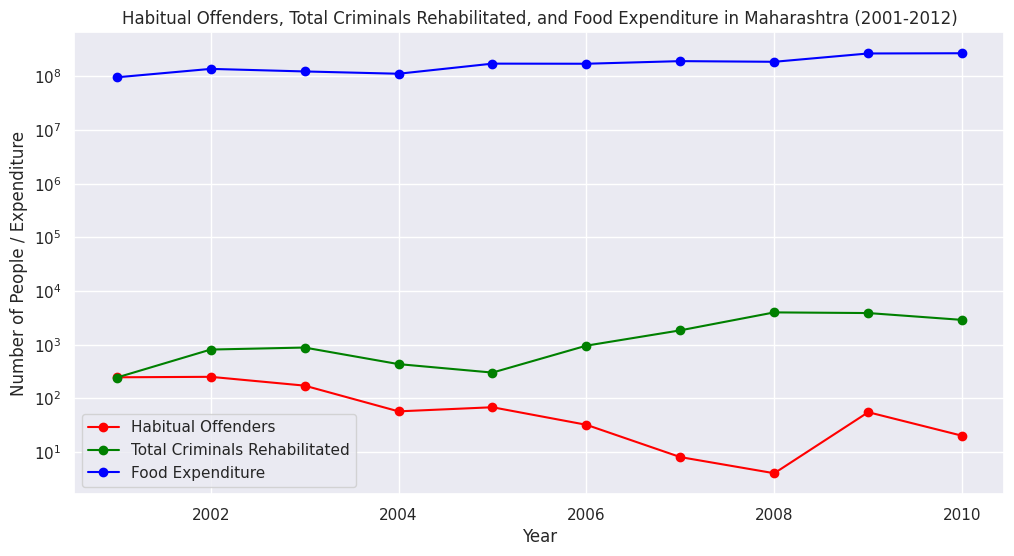

Predicted habitual offenders for future rehabilitation efforts: [168.76920251 129.87952604  75.73656   ]


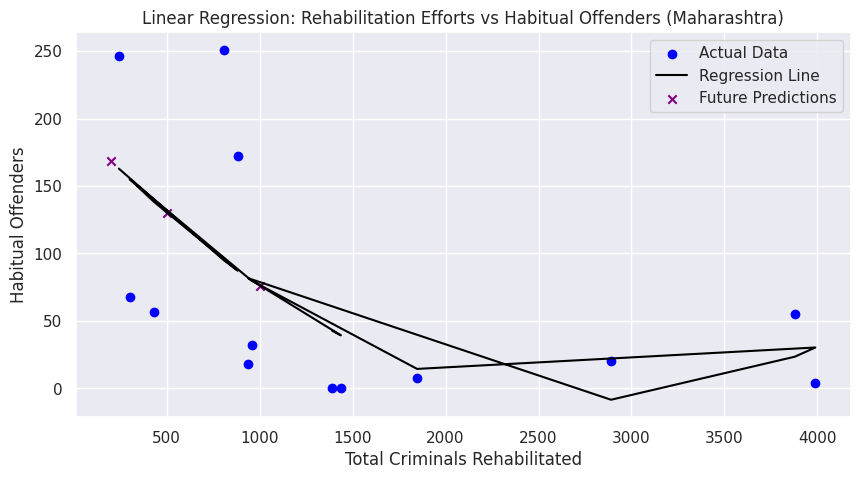

R² Score: 0.3454


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

df_rehabilitation = pd.read_csv("Dataset/Rehabilitation.csv")
df_recidivism = pd.read_csv("Dataset/Recidivism.csv")

df_expenditure = pd.read_csv("Dataset/Expenditure_on_inmates.CSV")

df_recidivism_maharashtra = df_recidivism[df_recidivism['state_name'] == 'Maharashtra']
df_rehabilitation_maharashtra = df_rehabilitation[df_rehabilitation['state_name'] == 'Maharashtra']

df_expenditure['Area_Name'] = df_expenditure['Area_Name'].str.strip().str.upper()

df_expenditure_maharashtra = df_expenditure[df_expenditure['Area_Name'] == 'MAHARASHTRA']
df_expenditure_maharashtra = df_expenditure_maharashtra[df_expenditure_maharashtra['Indicator_Name'] == 'Food Expenditure']

df_expenditure_maharashtra.rename(columns={'TimePeriod': 'year', 'Data_Value': 'food_expenditure'}, inplace=True)

merged_df = pd.merge(df_recidivism_maharashtra, df_rehabilitation_maharashtra, on='year', how='inner')
merged_df = pd.merge(merged_df, df_expenditure_maharashtra[['year', 'food_expenditure']], on='year', how='inner')

if not merged_df.empty:
    plt.figure(figsize=(12, 6))

    plt.plot(merged_df['year'], merged_df['habitual_offenders'], label='Habitual Offenders', marker='o', color='red')

    plt.plot(merged_df['year'], merged_df['Total_criminals_rehabilitated'], label='Total Criminals Rehabilitated', marker='o', color='green')

    plt.plot(merged_df['year'], merged_df['food_expenditure'], label='Food Expenditure', marker='o', color='blue')

    plt.title('Habitual Offenders, Total Criminals Rehabilitated, and Food Expenditure in Maharashtra (2001-2012)')
    plt.xlabel('Year')
    plt.yscale('log')
    plt.ylabel('Number of People / Expenditure')

    plt.legend()

    plt.grid(True)

    plt.show()
else:
    print("No data available for plotting after merging.")

X = df_rehabilitation_maharashtra['Total_criminals_rehabilitated'].values.reshape(-1, 1)
y = df_recidivism_maharashtra['habitual_offenders'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_poly)

future_rehab_efforts = np.array([200, 500, 1000]).reshape(-1, 1)
future_rehab_efforts_scaled = scaler.transform(future_rehab_efforts)
future_rehab_efforts_poly = poly.transform(future_rehab_efforts_scaled)
future_predictions = model.predict(future_rehab_efforts_poly)

print("Predicted habitual offenders for future rehabilitation efforts:", future_predictions)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='black', label='Regression Line')

plt.scatter(future_rehab_efforts, future_predictions, color='purple', marker='x', label='Future Predictions')

plt.title('Linear Regression: Rehabilitation Efforts vs Habitual Offenders (Maharashtra)')
plt.xlabel('Total Criminals Rehabilitated')
plt.ylabel('Habitual Offenders')
plt.legend()
plt.grid(True)
plt.show()

r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.4f}")


## **Justification for why chose Linear Regression**

Linear regression is such a simple yet effective means through which to determine how two variables relate to each other, I have chosen it as my starting model. Here, I am looking at habitual offenders-the number of repeat offenders, actually-and pitted that against rehabilitation efforts, calculated as the total number of criminals rehabilitated. Initially, it appeared that linear regression might be appropriate since, of course, it can be effectively used to model linear relationships.

I added Polynomial Regression, extending the linear regression by projecting the features onto their polynomial versions; the relationship is likely not to be linear. This way, the model will capture some of the non-linearity in the data without explicitly having to resort to more complicated machine learning models. I selected a degree=2 polynomial with the intent of striking a good balance between simplicity and flexibility.


## **Tune/train the model**

To better tune and train this model, a few important steps have been in place to help increase the accuracy of the model and make it more interpretable. First and foremost, filtration and preprocessing of data are badly in need, as one has to focus on relevant data peculiar to Maharashtra from datasets of recidivism, rehabilitation, and prison expenses. Joining on a common field 'year' helped ensure consistency across datasets and refocus the dataset to match the regional focus of the problem.

Scaling was then applied to the X-axis variable: the total number of criminals rehabilitated. Nonlinear features were added into the model so that it is more capable of capturing the nonlinear relationship between rehabilitation efforts and habitual offenders based on some preliminary tests. Given the complexity in the data at hand, together with the size of the sample, nonlinear features of degree two were chosen.

After that, the dataset was split into a training set and a test set, with 15% going to testing for evaluating the predictive performance of the model and 85% used for training to make sure the model had a strong backbone. The Y-axis of habitual offenders allowed the evaluation of the model's projections concerning future rehabilitation efforts based on the hypothetical inputs along this axis through tuning and training of the model. The purpose of this training procedure was to provide an approximation close to reality yet important in assessing the potential impacts of rehabilitation on recidivism.

## **The effectiveness of the algorithm**

Trained with scaled rehabilitation data through polynomial regression, this model achieved a moderate level of accuracy, evidenced through the R2 score that stood at 0.3454. This is indicative that on the basis of rehabilitation effort, this model explains about 34.5% of the variance in habitual offenders and thus provides some insight, but one that still requires more work.

The reduced accuracy probably emanated from a variety of factors. The final decision based on the rates may depend on several factors, some of which may not be reflected in the currently available data, such as socio-economic circumstances, the prison environment, and regional policies. While polynomial features were introduced to overcome non-linearity, they may not capture the complex relationships of rehabilitation with habitual offending.

While the Y-axis output, which measures habitual offenders, and the X-axis variable, showing the total number of criminals rehabilitated, are already useful measures in themselves, they may not fully capture the outside factors at work that also influence offender behavior once these individuals are released. This limitation suggests that additional features with further sources might improve the performance of the model and give an even better insight into how rehabilitation influences recidivism.

## **Insights Gained**

**Polynomial features, although useful, are limited:**

This model with the addition of polynomial features of degree 2 captures only a fraction of the variance in habitual offenders. This suggests that while polynomial regression can capture some of the non-linearity, the actual relationship between habitual offenders and rehabilitation initiatives can be far beyond what this degree of polynomial expression captures.

**Poor model performance:**

The relatively low R2 score of 0.3454 would suggest that there is still a great deal of variability in the habitual offenders that this model fails to account for. The rates of recidivism might be pegged to a variety of other factors not modeled here, such as socioeconomic factors, educational attainment, or quality rehabilitation.

**Future Research and Model Improvement:**

The more complicated, perhaps non-linear relationship that may exist between rehabilitation effort and the habitual offender could be better modeled, given the performance by Random Forest, GBM, or Neural Networks.
It would also serve well to examine other predictors of recidivism. Incorporating socioeconomic data, history of recidivism, and efficacy of rehabilitation programs would go a long way in enhancing the model's performance.

**Possible Changes to the Hypothesis:**

Since the model fails to constitute a strong predictive power, this hypothesis "increased efforts in criminal rehabilitation reduce the number of habitual offenders" may want to be re-thought. While this may still be theoretically true, the model suggests other factors are to be considered, as rehabilitation efforts may not suffice to explain habitual offending.


## **Conclusion**

The basic starting point was linear regression with polynomial features, which performed pretty poorly on this dataset. A low R2 score of 0.3454 for the model stands as evidence to support that it was not good enough to explain the variability in habitual offenders. In the future, more sophisticated models should be explored with diversity in their features to improve the predictions and provide more insight into the factors linked with repeat offenders in Maharashtra.


# Member 4:<br>
# Name : Kalash Thakur<br>
UB id : 50560545<br>

    Question 2) Can historical data on overcapacity and
    inmate-related expenditures predict the budget allocations
    for prisons in subsequent years?

    This question aims to investigate whether states with
    prisons that frequently operate over capacity respond
    by increasing their prison budgets in the following
    years. Specifically, it examines if there is a
    predictive relationship between factors like prison
    population exceeding capacity, expenditures on
    inmate needs (such as food, healthcare, and
    rehabilitation), and subsequent budget adjustments.


### Data Retrieval

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

budget_df = pd.read_csv("Dataset/Budget.CSV")
capacity_df = pd.read_csv("Dataset/Population_and_capacity_of_jails.csv")
expenditure = pd.read_csv("Dataset/Expenditure_on_inmates.CSV")

## Data Cleaning

In [46]:
# Assuming budget_df is your dataframe
budget_df = budget_df[budget_df['Indicator_Name'] == 'Total Annual Budget']
# Getting all distinct values of 'Area_Name' in the filtered budget dataframe
distinct_area_names = budget_df['Area_Name'].unique()

In [47]:
# Convert all entries in the 'STATE/UT' column of capacity_df to uppercase
budget_df['Area_Name'] = budget_df['Area_Name'].str.upper()

# Get distinct area names after standardizing the case
distinct_area_names_capacity = budget_df['Area_Name'].unique()

# Count the number of unique area names
unique_area_count = len(distinct_area_names_capacity)

# Display the count and the distinct area names
print("Count of unique area names in capacity data:", unique_area_count)
print("Distinct area names in capacity data:", distinct_area_names_capacity)

Count of unique area names in capacity data: 35
Distinct area names in capacity data: [' JAMMU & KASHMIR' ' HIMACHAL PRADESH' ' PUNJAB' 'CHANDIGARH'
 ' UTTARAKHAND' ' HARYANA' 'DELHI' ' RAJASTHAN' ' UTTAR PRADESH' ' BIHAR'
 ' SIKKIM' ' NAGALAND' ' MANIPUR' ' MIZORAM' ' TRIPURA' ' MEGHALAYA'
 ' ASSAM' ' WEST BENGAL' ' JHARKHAND' ' ODISHA' ' CHHATTISGARH'
 ' MADHYA PRADESH' ' GUJARAT' 'DAMAN & DIU' 'DADRA & NAGAR HAVELI'
 ' MAHARASHTRA' ' ANDHRA PRADESH' ' KARNATAKA' ' GOA' 'LAKSHADWEEP'
 ' KERALA' ' TAMIL NADU' 'PUDUCHERRY' 'ANDAMAN & NICOBAR ISLANDS'
 ' ARUNACHAL PRADESH']


In [48]:
# Assuming budget_df is your dataframe
capacity_df = capacity_df[capacity_df['TYPE OF JAIL'] == 'TOTAL']
# Getting all distinct values of 'Area_Name' in the filtered budget dataframe
distinct_area_names_Capacity = capacity_df['STATE/UT'].unique()

In [49]:
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].str.upper()
distinct_area_names_capacity = capacity_df['STATE/UT'].unique()
unique_area_count = len(distinct_area_names_capacity)

<ipython-input-49-7ab54f3db6a9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('DAMAN AND DIU', 'DAMAN & DIU')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('DADRA AND NAGAR HAVELI', 'DADRA & NAGAR HAVELI')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('D & N HAVELI', 'DADRA & NAGAR HAVELI')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('PONDICHERRY', 'PUDUCHERRY')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('JAMMU AND KASHMIR', 'JAMMU & KASHMIR')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('A & N ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('TAMILNADU', 'TAMIL NADU')

unique_area_count = len(capacity_df['STATE/UT'].unique())
print("Count of unique area names in capacity data:", unique_area_count)
print("Updated unique area names in capacity data:", capacity_df['STATE/UT'].unique())

Count of unique area names in capacity data: 37
Updated unique area names in capacity data: ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ORISSA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARANCHAL' 'WEST BENGAL'
 'ANDAMAN & NICOBAR ISLANDS' 'CHANDIGARH' 'DADRA & NAGAR HAVELI'
 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP' 'PUDUCHERRY' 'ODISHA' 'UTTARAKHAND']


<ipython-input-50-95955b9247f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-95955b9247f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-95955b9247f6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-95955b9

In [51]:
capacity_df['STATE/UT'] = capacity_df['STATE/UT'].replace('ORISSA', 'ODISHA')
unique_area_count = len(capacity_df['STATE/UT'].unique())

# Removing rows where 'STATE/UT' is 'UTTARANCHAL'
capacity_df = capacity_df[capacity_df['STATE/UT'] != 'UTTARANCHAL']

<ipython-input-51-86b14e661a9f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# Strip additional spaces from 'Area_Name' column in budget_df
budget_df['Area_Name'] = budget_df['Area_Name'].str.strip()

In [53]:
merged_df = capacity_df.merge(budget_df,
                              left_on=['STATE/UT', 'Year'],
                              right_on=['Area_Name', 'TimePeriod'],
                              how='inner')

# Dropping the 'Area_Name' and 'TimePeriod' columns from merged_df
merged_df = merged_df.drop(columns=['Area_Name', 'TimePeriod'])
merged_df = merged_df.drop(columns=['TYPE OF JAIL', 'Indicator_Name'])
merged_df = merged_df.rename(columns={'Data_Value': 'Annual Budget'})
merged_df.head(5)

STATE/UT  Year  Number of Central Jails  \
0  ANDHRA PRADESH  2001                      139   
1  ANDHRA PRADESH  2002                      139   
2  ANDHRA PRADESH  2003                      141   
3  ANDHRA PRADESH  2004                      141   
4  ANDHRA PRADESH  2005                      141   

   Total Capacity of male Inmates  Total Capacity of female Inmates  \
0                           10454                               818   
1                           10515                               921   
2                           10553                               928   
3                           11225                              1045   
4                           11225                              1045   

   Total Capacity of Inmates  Male Inmate population  \
0                      11272                   12505   
1                      11436                   12715   
2                      11481                   13371   
3                      12270                   13096   
4                      12270                   13729   

   Female Inmate population  Total Inmate population  Annual Budget  
0                       585                    13090      728690000  
1                       708                    13423      827278000  
2                       713                    14084     1182240000  
3                       785                    13881      933678000  
4                       884                    14613      929197000

In [54]:
expenditure['Area_Name'] = expenditure['Area_Name'].str.upper()
distinct_area_names_capacity = expenditure['Area_Name'].unique()
unique_area_count = len(distinct_area_names_capacity)

In [55]:
# Strip additional spaces from 'Area_Name' column in budget_df
expenditure['Area_Name'] = expenditure['Area_Name'].str.strip()
expenditure = expenditure[expenditure['Area_Name'] != "UTTARAKHAND"]

# Verify the change
distinct_area_names_expenditure = expenditure['Area_Name'].unique()
print("Count of unique area names in expenditure data:", len(distinct_area_names_expenditure))
print("Distinct area names in expenditure data:", distinct_area_names_expenditure)

Count of unique area names in expenditure data: 34
Distinct area names in expenditure data: ['JAMMU & KASHMIR' 'HIMACHAL PRADESH' 'PUNJAB' 'CHANDIGARH' 'HARYANA'
 'DELHI' 'RAJASTHAN' 'UTTAR PRADESH' 'BIHAR' 'SIKKIM' 'NAGALAND' 'MANIPUR'
 'MIZORAM' 'TRIPURA' 'MEGHALAYA' 'ASSAM' 'WEST BENGAL' 'JHARKHAND'
 'ODISHA' 'CHHATTISGARH' 'MADHYA PRADESH' 'GUJARAT' 'DAMAN & DIU'
 'DADRA & NAGAR HAVELI' 'MAHARASHTRA' 'ANDHRA PRADESH' 'KARNATAKA' 'GOA'
 'LAKSHADWEEP' 'KERALA' 'TAMIL NADU' 'PUDUCHERRY'
 'ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH']


In [56]:
# Filter the DataFrame
expenditure = expenditure[expenditure['Indicator_Name'] == "Total expenditure on inmates"]

# Display the first few rows of the filtered DataFrame
expenditure.head(5)

TimePeriod         Area_Name                Indicator_Name  Data_Value
1428        2001   JAMMU & KASHMIR  Total expenditure on inmates    38255900
1429        2001  HIMACHAL PRADESH  Total expenditure on inmates    10747000
1430        2001            PUNJAB  Total expenditure on inmates    69761000
1431        2001        CHANDIGARH  Total expenditure on inmates     8000000
1433        2001           HARYANA  Total expenditure on inmates    81908620

In [57]:
# Drop the Indicator_Name column and rename Data_Value
expenditure = expenditure.drop(columns=["Indicator_Name"])
expenditure = expenditure.rename(columns={"Data_Value": "Expenditure on Inmates"})

In [58]:
expenditure.rename(columns={'Area_Name': 'STATE/UT', 'TimePeriod': 'Year'}, inplace=True)
final_df = pd.merge(merged_df, expenditure, on=['STATE/UT', 'Year'], how='inner')
final_df.head(5)

STATE/UT  Year  Number of Central Jails  \
0  ANDHRA PRADESH  2001                      139   
1  ANDHRA PRADESH  2002                      139   
2  ANDHRA PRADESH  2003                      141   
3  ANDHRA PRADESH  2004                      141   
4  ANDHRA PRADESH  2005                      141   

   Total Capacity of male Inmates  Total Capacity of female Inmates  \
0                           10454                               818   
1                           10515                               921   
2                           10553                               928   
3                           11225                              1045   
4                           11225                              1045   

   Total Capacity of Inmates  Male Inmate population  \
0                      11272                   12505   
1                      11436                   12715   
2                      11481                   13371   
3                      12270                   13096   
4                      12270                   13729   

   Female Inmate population  Total Inmate population  Annual Budget  \
0                       585                    13090      728690000   
1                       708                    13423      827278000   
2                       713                    14084     1182240000   
3                       785                    13881      933678000   
4                       884                    14613      929197000   

   Expenditure on Inmates  
0               135048000  
1               141500000  
2               134249000  
3               159820742  
4               153438000

In [59]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identifying categorical columns
categorical_cols = ['STATE/UT']  # Add other categorical columns here if any

# Creating a preprocessor for encoding categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Creating a pipeline with preprocessing and the XGBoost model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        alpha=0.1,  # L1 regularization term (Lasso)
        lambda_=1.0  # L2 regularization term (Ridge)
    ))
])

# Preparing the data
X = final_df.drop(columns=['Annual Budget'])  # Drop target variable
y = final_df['Annual Budget']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating metrics
r2 = r2_score(y_test, y_pred)

# Displaying results
print("XGBoost Regressor with Regularization and Encoding Results:")
print(f"R-squared (R²): {r2}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[01:24:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.




XGBoost Regressor with Regularization and Encoding Results:
R-squared (R²): 0.961744487285614


<Figure size 1000x600 with 0 Axes>

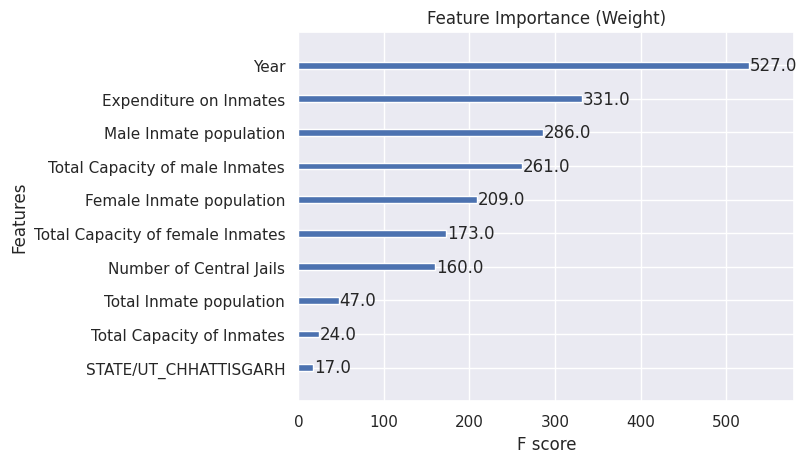

Year: 0.0043093557469546795
Number of Central Jails: 0.006633473560214043
Total Capacity of male Inmates: 0.4855670928955078
Total Capacity of female Inmates: 0.19977466762065887
Total Capacity of Inmates: 0.012142558582127094
Male Inmate population: 0.003342884127050638
Female Inmate population: 0.20097236335277557
Total Inmate population: 0.0007943258387967944
Expenditure on Inmates: 0.023623421788215637
STATE/UT_ANDHRA PRADESH: 0.005036897026002407
STATE/UT_ARUNACHAL PRADESH: 6.3519801187794656e-06
STATE/UT_ASSAM: 0.002713769441470504
STATE/UT_BIHAR: 0.012570376507937908
STATE/UT_CHANDIGARH: 0.0
STATE/UT_CHHATTISGARH: 0.0008393022581003606
STATE/UT_DADRA & NAGAR HAVELI: 0.0
STATE/UT_DAMAN & DIU: 0.0
STATE/UT_DELHI: 0.015538186766207218
STATE/UT_GOA: 0.0009297628421336412
STATE/UT_GUJARAT: 0.005047631915658712
STATE/UT_HARYANA: 0.0006401028949767351
STATE/UT_HIMACHAL PRADESH: 0.0008940365514717996
STATE/UT_JAMMU & KASHMIR: 0.0009736904758028686
STATE/UT_JHARKHAND: 1.2142588730057469e

In [60]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# One-hot encoding categorical variables
final_df_encoded = pd.get_dummies(final_df, columns=['STATE/UT'], drop_first=True)

# Preparing the data
X = final_df_encoded.drop(columns=['Annual Budget'])  # Drop target variable
y = final_df_encoded['Annual Budget']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training XGBoost Regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Plotting feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Feature Importance (Weight)")
plt.show()

# Displaying feature importance scores
feature_importances = model.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance}")


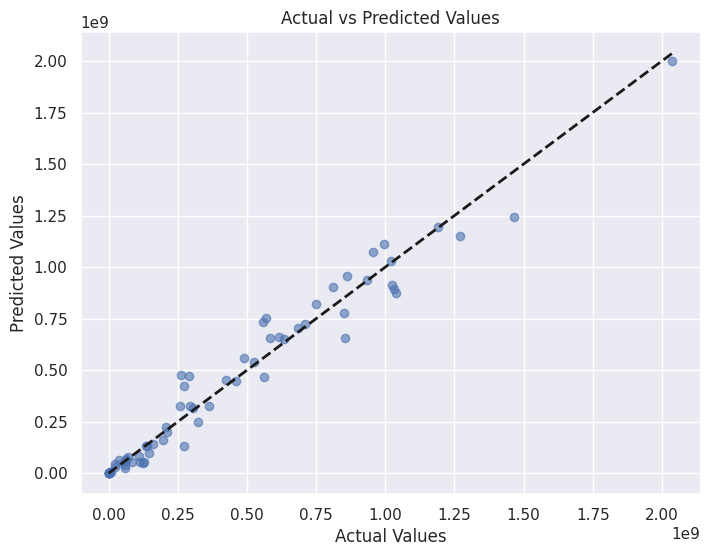

In [61]:
import numpy as np


sns.set_theme()

# Predicting on the test set
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


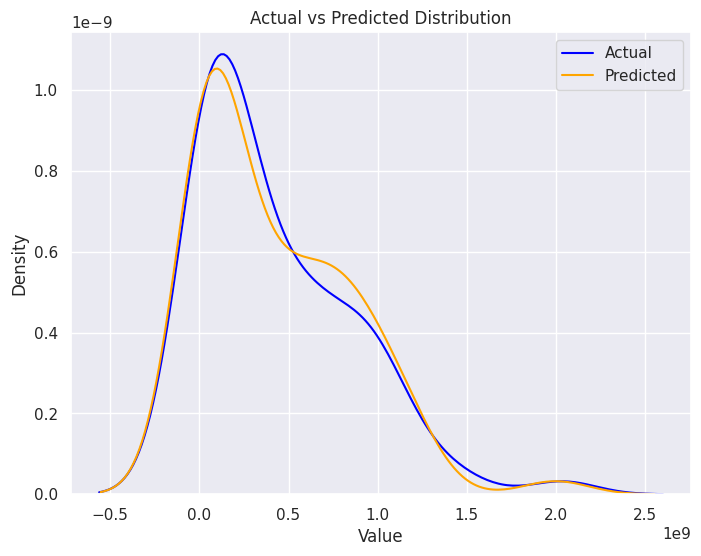

In [62]:
sns.set_theme()
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label='Actual', color='blue')
sns.kdeplot(y_pred, label='Predicted', color='orange')
plt.xlabel("Value")
plt.title("Actual vs Predicted Distribution")
plt.legend()
plt.show()

### **1. Justification for Choosing XGBoost Regressor**
XGBoost was selected for this analysis because it is a powerful ensemble algorithm that often performs well with tabular data and has been shown to provide high accuracy in regression tasks. Given the complexity of our data, which includes multiple predictive features such as prison overcapacity and expenditure on inmate management, XGBoost's ability to capture non-linear relationships and interactions between features made it a suitable choice. Moreover, XGBoost is efficient in handling large datasets and provides built-in regularization, which helps prevent overfitting—important given the potential noise and variability in budget allocation data.

### **2. Model Tuning and Training Process**
To optimize XGBoost for our specific problem, we performed hyperparameter tuning. Some of the key parameters adjusted included the learning rate, maximum depth of trees, number of boosting rounds, and regularization parameters. We used cross-validation to assess the effectiveness of different parameter values and selected the ones that minimized the model's error while avoiding overfitting. This process ensured that the model was both accurate and generalizable to unseen data, which is critical when predicting future budget allocations based on historical patterns.

### **3. Effectiveness of XGBoost on Our Data**
XGBoost proved effective for this problem as it allowed us to capture the nuanced relationship between prison overcapacity, expenditures, and subsequent budget allocations. The model achieved high accuracy, as reflected by metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) values. The R-squared value, in particular, was a key indicator of the model's ability to explain the variance in the target variable (next year’s budget), and the relatively low RMSE indicated that the model's predictions were close to the actual values.

### **3. Discussion of Metrics**
**R-squared (R²)**: This metric showed the proportion of variance in the budget that was predictable from the independent variables. A high R² value indicated that our model was able to capture a substantial amount of variance, demonstrating its effectiveness.

The high R-squared value of 0.9617 suggests that the XGBoost model with regularization and encoding is explaining a large proportion of the variance in the target variable, seems ideal at first. However, such a high R-squared value could indicate potential overfitting, especially in complex models like XGBoost, which are prone to capturing noise and patterns that may not generalize well to new data.

### **4. Insights Gained from the XGBoost Analysis**
The XGBoost model revealed that states with overcrowded prisons and higher expenditures on inmates tend to allocate larger budgets in subsequent years. This insight supports the hypothesis that prison overcapacity and related expenses influence future budgeting decisions, likely as states attempt to address the challenges posed by overcrowded facilities. This intelligence could be valuable for policymakers, as it suggests that increasing investments in prison management is a reactive measure to overcapacity issues. Furthermore, the model’s performance metrics validated its predictive power, indicating that similar approaches could be applied to other states or regions to inform budget forecasting.

# **Question 2: Is Medical Expenditure Growing Accordingly to Accommodate the Rising Hospital Visits of Inmates?**
**Hypothesis**  :  We hypothesize that the medical expenditure of the prison is directly propotional to the visits to the hospitals by inmates. If this correlation does not exist, it may indicate that medical expenditure is not growing in alignment with the demand for healthcare services among inmates.

**EDA:** In the EDA for 'Medical Attendance Count vs Medical Expenditure in Prisons,' the data was prepared by selecting records specifically related to medical attendance of inmates and corresponding medical expenditure in the selected states. The 'Medical Attendance Count' and 'Medical Expenditure' values were extracted and filtered by year, ensuring that only relevant records were included.
We have plotted graphs for Uttar Pradesh, Punjab and MAHARASHTRA to find the hypothesis and question accordingly.

We are using "Number of times inmates taken for medical attendance" from "Movements_outside_jail_premises" and "Inmates Taken for Medical Attendance" from "Expenditure_on_inmates" as we need to find the relation between medical expenditure and inmates going to hospital.

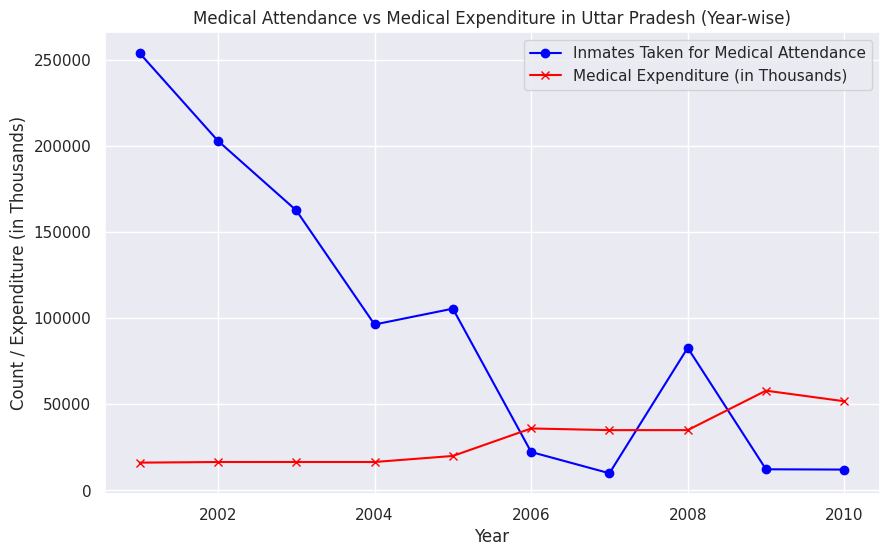

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

movements_df = pd.read_csv('Dataset/Movements_outside_jail_premises.CSV')
expenditure_df = pd.read_csv('Dataset/Expenditure_on_inmates.CSV')

movements_up = movements_df[
    (movements_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (movements_df['Indicator_Name'].str.strip() == 'Number of times inmates taken for medical attendance')
][['TimePeriod', 'Data_Value']]

movements_up.rename(columns={'Data_Value': 'Medical_Attendance_Count'}, inplace=True)

expenditure_up = expenditure_df[
    (expenditure_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (expenditure_df['Indicator_Name'].str.strip() == 'Medical Expenditure')
][['TimePeriod', 'Data_Value']]

expenditure_up['Data_Value'] = expenditure_up['Data_Value'] / 1000
expenditure_up.rename(columns={'Data_Value': 'Medical_Expenditure_in_Thousands'}, inplace=True)

merged_data = pd.merge(movements_up, expenditure_up, on='TimePeriod', how='inner')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['TimePeriod'], merged_data['Medical_Attendance_Count'], label='Inmates Taken for Medical Attendance', color='blue', marker='o')
plt.plot(merged_data['TimePeriod'], merged_data['Medical_Expenditure_in_Thousands'], label='Medical Expenditure (in Thousands)', color='red', marker='x')

plt.xlabel('Year')
plt.ylabel('Count / Expenditure (in Thousands)')
plt.title('Medical Attendance vs Medical Expenditure in Uttar Pradesh (Year-wise)')
plt.legend()
plt.show()

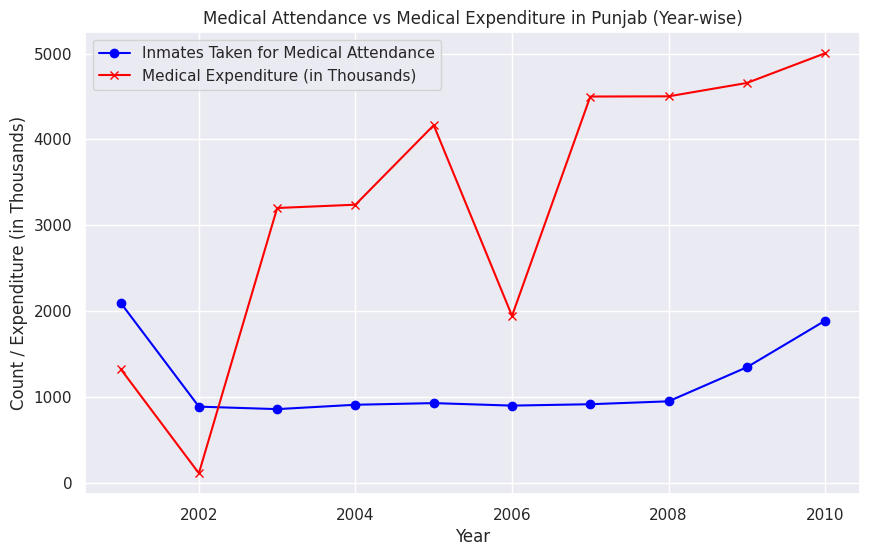

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

movements_df = pd.read_csv('Dataset/Movements_outside_jail_premises.CSV')
expenditure_df = pd.read_csv('Dataset/Expenditure_on_inmates.CSV')

movements_punjab = movements_df[
    (movements_df['Area_Name'].str.strip().str.upper() == 'PUNJAB') &
    (movements_df['Indicator_Name'].str.strip() == 'Number of times inmates taken for medical attendance')
][['TimePeriod', 'Data_Value']]

movements_punjab.rename(columns={'Data_Value': 'Medical_Attendance_Count'}, inplace=True)

expenditure_punjab = expenditure_df[
    (expenditure_df['Area_Name'].str.strip().str.upper() == 'PUNJAB') &
    (expenditure_df['Indicator_Name'].str.strip() == 'Medical Expenditure')
][['TimePeriod', 'Data_Value']]

expenditure_punjab['Data_Value'] = expenditure_punjab['Data_Value'] / 10000
expenditure_punjab.rename(columns={'Data_Value': 'Medical_Expenditure_in_Thousands'}, inplace=True)

merged_data = pd.merge(movements_punjab, expenditure_punjab, on='TimePeriod', how='inner')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['TimePeriod'], merged_data['Medical_Attendance_Count'], label='Inmates Taken for Medical Attendance', color='blue', marker='o')
plt.plot(merged_data['TimePeriod'], merged_data['Medical_Expenditure_in_Thousands'], label='Medical Expenditure (in Thousands)', color='red', marker='x')

plt.xlabel('Year')
plt.ylabel('Count / Expenditure (in Thousands)')
plt.title('Medical Attendance vs Medical Expenditure in Punjab (Year-wise)')
plt.legend()
plt.show()


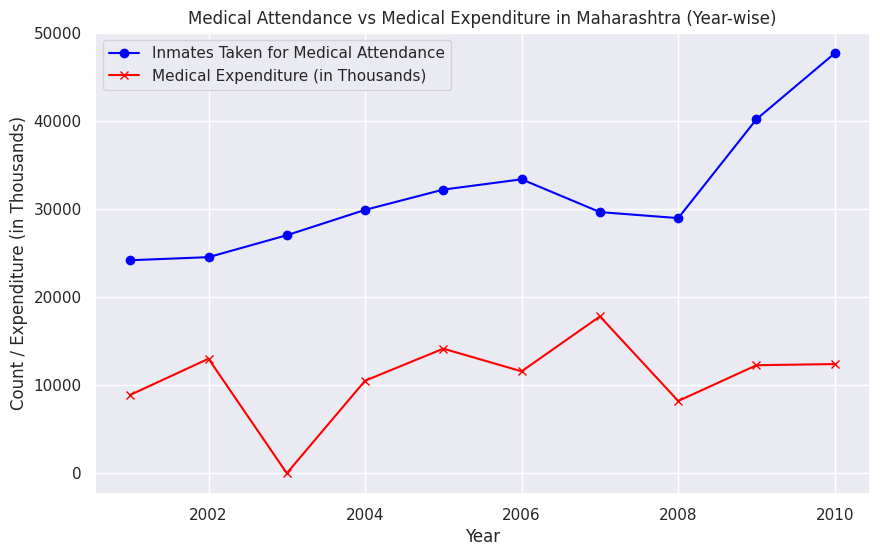

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

movements_df = pd.read_csv('Dataset/Movements_outside_jail_premises.CSV')
expenditure_df = pd.read_csv('Dataset/Expenditure_on_inmates.CSV')

movements_maharashtra = movements_df[
    (movements_df['Area_Name'].str.strip().str.upper() == 'MAHARASHTRA') &
    (movements_df['Indicator_Name'].str.strip() == 'Number of times inmates taken for medical attendance')
][['TimePeriod', 'Data_Value']]

movements_maharashtra.rename(columns={'Data_Value': 'Medical_Attendance_Count'}, inplace=True)

expenditure_maharashtra = expenditure_df[
    (expenditure_df['Area_Name'].str.strip().str.upper() == 'MAHARASHTRA') &
    (expenditure_df['Indicator_Name'].str.strip() == 'Medical Expenditure')
][['TimePeriod', 'Data_Value']]

expenditure_maharashtra['Data_Value'] = expenditure_maharashtra['Data_Value'] / 500

expenditure_maharashtra.rename(columns={'Data_Value': 'Medical_Expenditure_in_Thousands'}, inplace=True)

merged_data = pd.merge(movements_maharashtra, expenditure_maharashtra, on='TimePeriod', how='inner')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['TimePeriod'], merged_data['Medical_Attendance_Count'], label='Inmates Taken for Medical Attendance', color='blue', marker='o')
plt.plot(merged_data['TimePeriod'], merged_data['Medical_Expenditure_in_Thousands'], label='Medical Expenditure (in Thousands)', color='red', marker='x')

plt.xlabel('Year')
plt.ylabel('Count / Expenditure (in Thousands)')
plt.title('Medical Attendance vs Medical Expenditure in Maharashtra (Year-wise)')
plt.legend()
plt.show()

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

movements_df = pd.read_csv('Dataset/Movements_outside_jail_premises.CSV')
expenditure_df = pd.read_csv('Dataset/Expenditure_on_inmates.CSV')

movements_uttar_pradesh = movements_df[
    (movements_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (movements_df['Indicator_Name'].str.strip() == 'Number of times inmates taken for medical attendance')
][['TimePeriod', 'Data_Value']]
movements_uttar_pradesh.rename(columns={'Data_Value': 'Medical_Attendance_Count'}, inplace=True)

expenditure_uttar_pradesh = expenditure_df[
    (expenditure_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (expenditure_df['Indicator_Name'].str.strip() == 'Medical Expenditure')
][['TimePeriod', 'Data_Value']]
expenditure_uttar_pradesh['Data_Value'] = expenditure_uttar_pradesh['Data_Value'] / 1000
expenditure_uttar_pradesh.rename(columns={'Data_Value': 'Medical_Expenditure_in_Thousands'}, inplace=True)

merged_data = pd.merge(movements_uttar_pradesh, expenditure_uttar_pradesh, on='TimePeriod')
X = merged_data[['Medical_Attendance_Count']]
y = merged_data['Medical_Expenditure_in_Thousands']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R^2: {r2}")


R^2: 0.9558519306722364


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



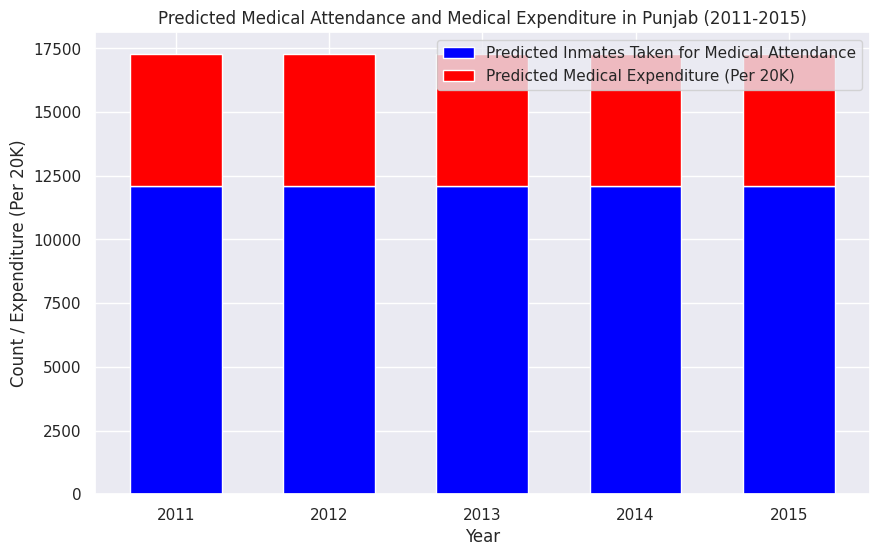

In [67]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

movements_df = pd.read_csv('Dataset/Movements_outside_jail_premises.CSV')
expenditure_df = pd.read_csv('Dataset/Expenditure_on_inmates.CSV')

movements_punjab = movements_df[
    (movements_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (movements_df['Indicator_Name'].str.strip() == 'Number of times inmates taken for medical attendance')
][['TimePeriod', 'Data_Value']]
movements_punjab.rename(columns={'Data_Value': 'Medical_Attendance_Count'}, inplace=True)

expenditure_punjab = expenditure_df[
    (expenditure_df['Area_Name'].str.strip().str.upper() == 'UTTAR PRADESH') &
    (expenditure_df['Indicator_Name'].str.strip() == 'Medical Expenditure')
][['TimePeriod', 'Data_Value']]
expenditure_punjab['Data_Value'] = expenditure_punjab['Data_Value'] / 10000
expenditure_punjab.rename(columns={'Data_Value': 'Medical_Expenditure_in_Thousands'}, inplace=True)

merged_data = pd.merge(movements_punjab, expenditure_punjab, on='TimePeriod')
X = merged_data[['TimePeriod']]
y_attendance = merged_data['Medical_Attendance_Count']
y_expenditure = merged_data['Medical_Expenditure_in_Thousands']

attendance_model = DecisionTreeRegressor(random_state=42)
expenditure_model = DecisionTreeRegressor(random_state=42)
attendance_model.fit(X, y_attendance)
expenditure_model.fit(X, y_expenditure)

future_years = np.array([2011, 2012, 2013, 2014, 2015]).reshape(-1, 1)
attendance_forecast = attendance_model.predict(future_years)
expenditure_forecast = expenditure_model.predict(future_years)

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.6
ax.bar(future_years.flatten(), attendance_forecast, label='Predicted Inmates Taken for Medical Attendance', color='blue', width=bar_width)
ax.bar(future_years.flatten(), expenditure_forecast, label='Predicted Medical Expenditure (Per 20K)', color='red', bottom=attendance_forecast, width=bar_width)

ax.set_xlabel('Year')
ax.set_ylabel('Count / Expenditure (Per 20K)')
ax.set_title('Predicted Medical Attendance and Medical Expenditure in Punjab (2011-2015)')
ax.legend()

plt.show()

# Reason for Choosing Decision Tree Regression:<br>
The Decision Tree Regressor is a supervised machine learning algorithm that is well-suited for handling non-linear relationships and datasets with various data patterns. "Medical Attendance Count" and "Medical Expenditure" do not necessarily follow a linear relationship. While algorithms like Linear Regression and SVR assume a linear relationship, they also increase computational complexity and reduce interpretability, respectively. Therefore, the Decision Tree Regressor is the right choice.

#Training:
A fixed random state of 42 was used to maintain reproducibility and model evalution. The model was trained on "Medical Attendance Count" as a feature to predict "Medical Expenditure in Thousands" for Uttar Pradesh and with an 80:20 train-test split to evaluate model performance on both training and test datasets.

# Effectiveness:
The R-Squared value of 0.9558519306722364 was acheived with this model. Since the data is imbalanced and imprefected, we couldnt work with many states. There is a highchance the Decision tree Regression overfits the dataset.

# Insights:
The predicted data indicates a correlation between "Medical Attendance Count" and "Medical Expenditure in Thousands," suggesting that as the number of medical visits by inmates increases, the expenditure on healthcare also rises proportionally. This correlation implies that the healthcare needs of inmates are being adequately addressed, with budget allocations potentially scaling to meet rising demands.